<a href="https://colab.research.google.com/github/Prasang-Biyani/taxi-driver-churn-prediction/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#```Problem Statement```

Recruiting and retaining drivers is seen by industry watchers as a tough battle for the organization. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to other platform depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Company is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
df = pd.read_csv()
df.head()

MMM-YY  Driver_ID   Age  Gender City  Education_Level  Income  \
0  01/01/19          1  28.0     0.0  C23                2   57387   
1  02/01/19          1  28.0     0.0  C23                2   57387   
2  03/01/19          1  28.0     0.0  C23                2   57387   
3  11/01/20          2  31.0     0.0   C7                2   67016   
4  12/01/20          2  31.0     0.0   C7                2   67016   

  Dateofjoining LastWorkingDate  Joining Designation  Grade  \
0      24/12/18             NaN                    1      1   
1      24/12/18             NaN                    1      1   
2      24/12/18        03/11/19                    1      1   
3      11/06/20             NaN                    2      2   
4      11/06/20             NaN                    2      2   

   Total Business Value  Quarterly Rating  
0               2381060                 2  
1               -665480                 2  
2                     0                 2  
3                     0                 1  
4                     0                 1

In [ ]:
df.shape

(19104, 13)

In [ ]:
df.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

##<font color="red" face='georgia'>Features Description</font>

Dataset consists of 19104 data points with 13 features. 

Following are the description of features:

1. MMMM-YY : Reporting Date (Monthly)
2. Driver_ID : Unique id for drivers
3. Age : Age of the driver
4. Gender : Gender of the driver – Male : 0, Female: 1
5. City : City Code of the driver
6. Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
7. Income : Monthly average Income of the driver
8. Date Of Joining : Joining date for the driver
9. LastWorkingDate : Last date of working for the driver
10. Joining Designation : Designation of the driver at the time of joining
11. Grade : Grade of the driver at the time of reporting
12. Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
13. Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)


In [ ]:
# Converting Date(s) to Date Time Format
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

In [ ]:
df.dtypes

MMM-YY                  datetime64[ns]
Driver_ID                        int64
Age                            float64
Gender                         float64
City                            object
Education_Level                  int64
Income                           int64
Dateofjoining           datetime64[ns]
LastWorkingDate         datetime64[ns]
Joining Designation              int64
Grade                            int64
Total Business Value             int64
Quarterly Rating                 int64
dtype: object

In [ ]:
for column in df.columns:
  print(f'{column} : {len(df[column].unique())}')

MMM-YY : 24
Driver_ID : 2381
Age : 37
Gender : 3
City : 29
Education_Level : 3
Income : 2383
Dateofjoining : 869
LastWorkingDate : 494
Joining Designation : 5
Grade : 5
Total Business Value : 10181
Quarterly Rating : 4


Here we can see that, we have 3 unique genders. According to the data description, we have only 2 genders. 

In [ ]:
df['Gender'].unique()

array([ 0.,  1., nan])

Here df.unique consider ***nan*** as distinct value.

In [ ]:
df.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

```Age```, ```Gender``` and ```LastWorkingDate``` have missing values.

##<font color="red" face="georgia">Handling Missing values</font>

In [ ]:
# Taking driver's latest and fill the missing age using "Driver_ID"
# driver_age_mapping = {items["Driver_ID"] : items['Age'] for items in df[~df['Age'].isna()].groupby("Driver_ID").agg({'Age':'last'}).reset_index().to_dict(orient="records")}
# driver_gender_mapping = {items["Driver_ID"] : items['Gender'] for items in df[~df['Gender'].isna()].groupby("Driver_ID").agg({'Gender':'last'}).reset_index().to_dict(orient="records")}

# df['Age'] = df['Age'].fillna(df['Driver_ID'].replace(driver_age_mapping))
# df['Gender'] = df['Gender'].fillna(df['Age'].replace(driver_gender_mapping))

from sklearn.impute import KNNImputer

numerical_columns = ['Age', 'Gender', 'Education_Level', 'Income', 'Grade', 'Joining Designation', 
                     'Total Business Value', 'Quarterly Rating']
imputer = KNNImputer(n_neighbors=3)
imputed_values = imputer.fit_transform(df[numerical_columns])

# Converting Imputed Values to DataFrame
imputed_values_df = pd.DataFrame(imputed_values, columns=numerical_columns)

# # Here missing values for LastWorkingDate means driver didn't churn.
# # We will use the 'LastWorkingDate' missing values in feature engineering creation step.

In [ ]:
remaining_columns = ['Driver_ID', 'MMM-YY', 'City', 'Dateofjoining', 'LastWorkingDate']

In [ ]:
df = pd.concat([df[remaining_columns], imputed_values_df], axis=1)

In [ ]:
df.isna().sum()

Driver_ID                   0
MMM-YY                      0
City                        0
Dateofjoining               0
LastWorkingDate         17488
Age                         0
Gender                      0
Education_Level             0
Income                      0
Grade                       0
Joining Designation         0
Total Business Value        0
Quarterly Rating            0
dtype: int64

P.S: 
1. Here missing values for LastWorkingDate means driver didn't churn.
2. We will use the 'LastWorkingDate' missing values in feature engineering creation step.

In [ ]:
df.duplicated().sum()

0

There are no duplicate values

In [ ]:
# Creating new dataframe for storing aggregated values
df_new = pd.DataFrame()

In [ ]:
# Removing duplicates by conisdering only last (latest) values of driver
df_new['Driver_ID'] = df['Driver_ID'].unique()
df_new['Age'] = df.groupby('Driver_ID').agg({'MMM-YY': 'last', 'Age': 'last'})['Age'].astype(int).tolist()
df_new['Gender'] = df.groupby('Driver_ID').agg({'Gender': 'last'})['Gender'].astype(int).tolist()
df_new['City'] = df.groupby('Driver_ID').agg({'City': 'last'})['City'].tolist()
df_new['Education'] = df.groupby('Driver_ID').agg({'Education_Level': 'last'})['Education_Level'].tolist()
df_new['Income'] = df.groupby('Driver_ID').agg({'Income': 'last'})['Income'].tolist()
df_new['Joining Designation'] = df.groupby('Driver_ID').agg({'Joining Designation': 'last'})['Joining Designation'].tolist()
df_new['Grade'] = df.groupby('Driver_ID').agg({'Grade': 'last'})['Grade'].tolist()
df_new['Total Business Value'] = df.groupby('Driver_ID').agg({'Total Business Value': 'sum'})['Total Business Value'].tolist()
df_new['first_monthly_income'] = df.groupby('Driver_ID').agg({'Income': 'first'})['Income'].tolist()
df_new['last_monthly_income'] = df.groupby('Driver_ID').agg({'Income': 'last'})['Income'].tolist()
df_new['last_qtr_rating'] = df.groupby('Driver_ID').agg({'Quarterly Rating': 'last'})['Quarterly Rating'].tolist()
df_new['first_qtr_rating'] = df.groupby('Driver_ID').agg({'Quarterly Rating': 'first'})['Quarterly Rating'].tolist()

#```Feature Engineering - 1```

In [ ]:
# rating increased
df_new['rating_increased'] = df_new['last_qtr_rating'] > df_new['first_qtr_rating']
df_new['rating_increased'] = df_new['rating_increased'].replace({False: 0, True:1})

# last working data
df_new['LastWorkingDate'] = df.groupby('Driver_ID').agg({'LastWorkingDate':'last'})['LastWorkingDate']
df_new['target'] = df_new['LastWorkingDate'].isna().replace({True: 1, False:0})

# income_increased
df_new['income_increased'] = df_new['last_monthly_income'] > df_new['first_monthly_income']
df_new['income_increased'] = df_new['income_increased'].replace({False: 0, True:1})

In [ ]:
# Drop un-necessary columns
df_new.drop(['LastWorkingDate', 'last_qtr_rating', 'first_qtr_rating',
             'last_monthly_income', 'first_monthly_income'], axis=1, inplace=True)

In [ ]:
df_new.isnull().sum()

Driver_ID               0
Age                     0
Gender                  0
City                    0
Education               0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
rating_increased        0
target                  0
income_increased        0
dtype: int64

After aggregation, no values are missing.

In [ ]:
df_new.shape

(2381, 12)

After preprocessing and cleaning, there are 2381 data points and 11 features. Out of 11 features, ***rating_increased*** and ***target*** are feature engineered.

1. rating_increased: Quartely rating increased or not
2. target: Driver churned or not.

In [ ]:
# Number of unique values in each column after pre-processing
for i in df_new.columns:
  print(i, ':', df_new[i].nunique())

Driver_ID : 2381
Age : 36
Gender : 2
City : 29
Education : 3
Income : 2339
Joining Designation : 5
Grade : 5
Total Business Value : 1629
rating_increased : 2
target : 2
income_increased : 2


In [ ]:
df_new['Gender'] = df_new['Gender'].astype("category")
df_new['City'] = df_new['City'].astype("category")
df_new['Education'] = df_new['Education'].astype("category")
df_new['Joining Designation'] = df_new['Joining Designation'].astype("category")
df_new['Grade'] = df_new['Grade'].astype("category")
df_new['rating_increased'] = df_new['rating_increased'].astype("category")
df_new['income_increased'] = df_new['income_increased'].astype("category")
df_new['target'] = df_new['target'].astype("category")

In [ ]:
df_new.describe(exclude=['category'])

Driver_ID          Age         Income  Total Business Value
count  2381.000000  2381.000000    2381.000000          2.381000e+03
mean   1397.559009    33.673247   59334.157077          4.586742e+06
std     806.161628     5.973815   28383.666384          9.127115e+06
min       1.000000    21.000000   10747.000000         -1.385530e+06
25%     695.000000    29.000000   39104.000000          0.000000e+00
50%    1400.000000    33.000000   55315.000000          8.176800e+05
75%    2100.000000    37.000000   75986.000000          4.173650e+06
max    2788.000000    58.000000  188418.000000          9.533106e+07

##<font color="red" face="georgia">Observations</font>

1. Age: The maximum driver's age can be seen 58 years, while the minimum age is 21 years. The mean age is 34 years. 
2. Income: The maximum monthly income of the driver is more than 150K Rs/-, while the minimum income is 10747 Rs/-. The mean income is 59334 Rs/-.
5. Total Business Value: The maximum Business Value generated is 95331060, while the minimum value generated is -1385530. The mean value generated is 4586742


In [ ]:
df_new['Gender'].value_counts(normalize=True)

0    0.590508
1    0.409492
Name: Gender, dtype: float64

Male drivers account for 59.5% of all drivers, with females accounting for the remaining 41%.

In [ ]:
df_new['City'].value_counts(normalize=True)

C20    0.063839
C15    0.042419
C29    0.040319
C26    0.039059
C8     0.037379
C27    0.037379
C10    0.036119
C16    0.035279
C22    0.034439
C3     0.034439
C28    0.034439
C12    0.034019
C5     0.033599
C1     0.033599
C21    0.033179
C14    0.033179
C6     0.032759
C4     0.032339
C7     0.031919
C9     0.031499
C23    0.031079
C25    0.031079
C24    0.030659
C2     0.030239
C19    0.030239
C17    0.029819
C13    0.029819
C18    0.028979
C11    0.026879
Name: City, dtype: float64

City category C20 has the highest number of drivers, followed by C15 and C29. The C11 and C18 have the fewest drivers. 

In [ ]:
df_new['Education'].value_counts(normalize=True)

2.0    0.336833
1.0    0.333893
0.0    0.329273
Name: Education, dtype: float64

The proportion of education levels is equally distributed among drivers.

In [ ]:
df_new['Joining Designation'].value_counts(normalize=True)

1.0    0.430911
2.0    0.342293
3.0    0.207056
4.0    0.015120
5.0    0.004620
Name: Joining Designation, dtype: float64

The majority of the drivers who joined had a designation level of 1, i.e., 43%. At the time of joining, only 0.46% of drivers had a discrimination level of 5.

In [ ]:
df_new['Grade'].value_counts(normalize=True)

2.0    0.359093
1.0    0.311214
3.0    0.261655
4.0    0.057959
5.0    0.010080
Name: Grade, dtype: float64

Majority of drivers (36%) have grade of 2 at the time of reporting, followed by grade 1 (31%).

In [ ]:
df_new['rating_increased'].value_counts(normalize=True)

0    0.849643
1    0.150357
Name: rating_increased, dtype: float64

Only 15% of the drivers had their quarterly rating increased.

In [ ]:
df_new['income_increased'].value_counts(normalize=True)

0    0.98194
1    0.01806
Name: income_increased, dtype: float64

98% of the drivers' income increased.

In [ ]:
df_new['target'].value_counts(normalize=True)

0    0.576228
1    0.423772
Name: target, dtype: float64

42.3% of drivers had left, while the rest were still employed there. 

In [ ]:
# !pip3 install skimpy

In [ ]:
# from skimpy import skim
# print(skim(df_new))

In [ ]:
df_new.groupby("Gender")['City'].value_counts(normalize=True)

Gender     
0       C20    0.064011
        C15    0.048364
        C26    0.044097
        C29    0.043385
        C28    0.039118
        C21    0.036984
        C12    0.036273
        C10    0.036273
        C16    0.036273
        C14    0.035562
        C5     0.035562
        C22    0.034851
        C24    0.034139
        C25    0.034139
        C27    0.033428
        C13    0.033428
        C4     0.032717
        C19    0.032006
        C8     0.031294
        C1     0.030583
        C2     0.029872
        C3     0.029872
        C17    0.029161
        C7     0.029161
        C9     0.028450
        C18    0.025605
        C6     0.025605
        C11    0.025605
        C23    0.024182
1       C20    0.063590
        C8     0.046154
        C6     0.043077
        C27    0.043077
        C3     0.041026
        C23    0.041026
        C1     0.037949
        C7     0.035897
        C29    0.035897
        C10    0.035897
        C9     0.035897
        C22    0.033846
    

##<font color="red" face="georgia">Observations</font>

1. Both genders have nearly identical distributions in C20.
2. C15 is the second most popular city for male drivers, while C8 is the most popular city for female drivers. 

In [ ]:
df_new.groupby('Gender')['Education'].value_counts(normalize=True)

Gender     
0       2.0    0.342105
        0.0    0.329303
        1.0    0.328592
1       1.0    0.341538
        0.0    0.329231
        2.0    0.329231
Name: Education, dtype: float64

##<font color="red" face="georgia">Observations</font>

1. Graduates make up the majority of male drivers, followed by those 10+.
2. The majority of female drivers are 12+ educated, followed by those 10+.

In [ ]:
df_new.groupby('Gender')['Joining Designation'].value_counts(normalize=True)

Gender     
0       1.0    0.417496
        2.0    0.342105
        3.0    0.216216
        4.0    0.018492
        5.0    0.005690
1       1.0    0.450256
        2.0    0.342564
        3.0    0.193846
        4.0    0.010256
        5.0    0.003077
Name: Joining Designation, dtype: float64

##<font color="red" face="georgia">Observations</font>

1. The majority of both gender drivers had a designation level of 1, followed by level 2.
2. Female drivers accounted for 45% in level 1, while male drivers accounted for 42% in level 1.

In [ ]:
df_new.groupby('Gender')['Grade'].value_counts(normalize=True)

Gender     
0       2.0    0.360597
        1.0    0.309388
        3.0    0.261735
        4.0    0.058321
        5.0    0.009957
1       2.0    0.356923
        1.0    0.313846
        3.0    0.261538
        4.0    0.057436
        5.0    0.010256
Name: Grade, dtype: float64

##<font color="red" face="georgia">Observations</font>

At the time of reporting, both genders had the same grade and the same proportion.

In [ ]:
df_new.groupby('Gender')['rating_increased'].value_counts(normalize=True)

Gender   
0       0    0.857041
        1    0.142959
1       0    0.838974
        1    0.161026
Name: rating_increased, dtype: float64

##<font color="red" face="georgia">Observations</font>

Both genders had their ratings increase in nearly identical proportions.

In [ ]:
df_new.groupby('Gender')['target'].value_counts(normalize=True)

Gender   
0       0    0.566145
        1    0.433855
1       0    0.590769
        1    0.409231
Name: target, dtype: float64

##<font color="red" face="georgia">Observations</font>

Male drivers have a higher churn rate than female drivers. 

In [ ]:
df_new.groupby('Gender')['income_increased'].value_counts(normalize=True)

Gender   
0       0    0.984353
        1    0.015647
1       0    0.978462
        1    0.021538
Name: income_increased, dtype: float64

##<font color="red" face="georgia">Observations</font>

Both genders had their income increase in nearly identical proportions.

In [ ]:
df_new.groupby('Gender')['Age'].describe().T

Gender            0           1
count   1406.000000  975.000000
mean      33.514936   33.901538
std        5.833953    6.165792
min       21.000000   21.000000
25%       29.000000   30.000000
50%       33.000000   33.000000
75%       37.000000   37.000000
max       55.000000   58.000000

##<font color="red" face="georgia">Observations</font>

Descriptive Statistics for both genders w.r.t age are nearly identical.

In [ ]:
df_new.groupby('Gender')['Income'].describe().T

Gender              0              1
count     1406.000000     975.000000
mean     59117.867710   59646.057436
std      28627.007499   28040.734852
min      11068.000000   10747.000000
25%      39070.750000   39111.500000
50%      54769.500000   55834.000000
75%      74989.000000   77540.000000
max     188418.000000  148588.000000

##<font color="red" face="georgia">Observations</font>

1. The difference between the maximum and minimum monthly incomes of male and female drivers is 39830 and 321, respectively.
2. The mean monthly income is nearly identical for both genders.

In [ ]:
df_new.groupby('Gender')['Total Business Value'].describe().T

Gender             0             1
count   1.406000e+03  9.750000e+02
mean    4.451448e+06  4.781842e+06
std     8.851573e+06  9.511637e+06
min    -1.385530e+06 -6.451500e+05
25%     0.000000e+00  0.000000e+00
50%     7.434600e+05  9.421300e+05
75%     4.158815e+06  4.241000e+06
max     6.986790e+07  9.533106e+07

##<font color="red" face="georgia">Observations</font>

1. Interestingly, female drivers have generated more business value compared to male drivers.
2. Female drivers have a higher median total business value than male drivers. 

In [ ]:
df_new.groupby('target')['Income'].describe().T

target              0              1
count     1372.000000    1009.000000
mean     59539.075802   59055.516353
std      28251.264147   28574.391684
min      10747.000000   11068.000000
25%      39300.000000   38059.000000
50%      55359.000000   55108.000000
75%      75996.750000   75835.000000
max     188418.000000  167758.000000

##<font color="red" face="georgia">Observations</font>

1. The maximum income difference between the churner and the non-churner is $20,660.
2. The remaining statistics look nearly identical for all the Churner and non-Churner groups.

In [ ]:
df_new.groupby('target')['Age'].describe().T

target            0            1
count   1372.000000  1009.000000
mean      33.825073    33.466799
std        6.026928     5.897533
min       21.000000    21.000000
25%       29.000000    29.000000
50%       33.000000    33.000000
75%       37.000000    37.000000
max       55.000000    58.000000

##<font color="red" face="georgia">Observations</font>

The statistics for Churner and non-Churner groups are nearly identical.

In [ ]:
df_new.groupby('target')['City'].value_counts(normalize=True)

target     
0       C20    0.073615
        C29    0.044461
        C27    0.039359
        C5     0.038630
        C22    0.036443
        C7     0.036443
        C6     0.036443
        C16    0.036443
        C1     0.035714
        C15    0.035714
        C24    0.034257
        C26    0.034257
        C10    0.033528
        C25    0.033528
        C28    0.032799
        C12    0.032799
        C21    0.032799
        C8     0.032070
        C3     0.032070
        C9     0.032070
        C19    0.031341
        C18    0.031341
        C14    0.030612
        C2     0.029883
        C4     0.029155
        C11    0.026968
        C17    0.026239
        C23    0.025510
        C13    0.025510
1       C15    0.051536
        C20    0.050545
        C26    0.045590
        C8     0.044599
        C10    0.039643
        C23    0.038652
        C3     0.037661
        C4     0.036670
        C14    0.036670
        C28    0.036670
        C12    0.035679
        C13    0.035679
    

##<font color="red" face="georgia">Observations</font>

1. The non-churner drivers' most frequent city code is C20, followed by C29. The least frequent city code is C13.

2. The churner drivers' most frequent city code is C15, followed by C20. The least frequent city code is C18.

In [ ]:
df_new.groupby('target')['rating_increased'].value_counts(normalize=True)

target   
0       0    0.843294
        1    0.156706
1       0    0.858276
        1    0.141724
Name: rating_increased, dtype: float64

##<font color="red" face="georgia">Observations</font>

The rating increase statistics for both Churner and non-Churner groups are nearly identical.

In [ ]:
df_new.groupby('target')['income_increased'].value_counts(normalize=True)

target   
0       0    0.981778
        1    0.018222
1       0    0.982161
        1    0.017839
Name: income_increased, dtype: float64

##<font color="red" face="georgia">Observations</font>

The income increase statistics for both Churner and non-Churner groups are nearly identical.

In [ ]:
df_new.groupby('target')['Total Business Value'].describe().T

target             0             1
count   1.372000e+03  1.009000e+03
mean    4.809762e+06  4.283488e+06
std     9.355018e+06  8.803302e+06
min    -6.451500e+05 -1.385530e+06
25%     0.000000e+00  0.000000e+00
50%     9.237650e+05  6.540600e+05
75%     4.318628e+06  4.008780e+06
max     6.986790e+07  9.533106e+07

##<font color="red" face="georgia">Observations</font>

There is a huge difference between the minimum, maximum, and median total business value between the Churner and non-Churner groups.

In [ ]:
df_new.groupby('target')['Gender'].value_counts(normalize=True)

target   
0       0    0.580175
        1    0.419825
1       0    0.604559
        1    0.395441
Name: Gender, dtype: float64

##<font color="red" face="georgia">Observations</font>

60% of male drivers have quit, while remaining 40% female drivers have quit.

In [ ]:
df_new.groupby('target')['Education'].value_counts(normalize=True)

target     
0       0.0    0.342566
        2.0    0.334548
        1.0    0.322886
1       1.0    0.348860
        2.0    0.339941
        0.0    0.311199
Name: Education, dtype: float64

##<font color="red" face="georgia">Observations</font>

1. In the non-Churner group, the 10+ category education level is most common, followed by graduates.
2. In the Churner group, the 12+ category education level is most common, followed by graduates.

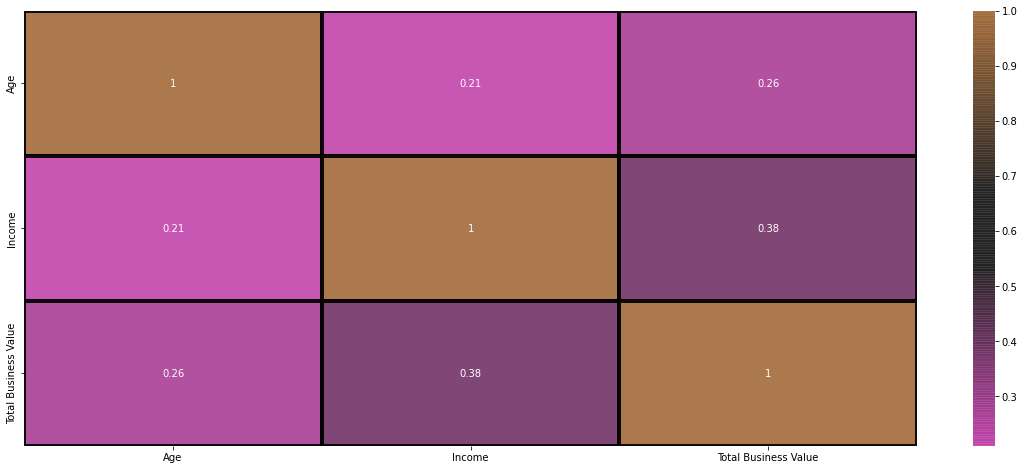

In [ ]:
plt.figure(figsize=(20, 8))
cmap = sns.diverging_palette(320, 40, sep=50, as_cmap=True, center="dark", n=10)
kwargs = {'alpha':.9,'linewidth':3, 'linecolor':'k','rasterized':False, 'edgecolor':'w', 'capstyle':'projecting',}
sns.heatmap(df_new.drop('Driver_ID', axis=1).corr(), annot=True, cmap=cmap, **kwargs)
plt.show()

##<font color="red" face="georgia">Observations</font>

1. The correlation between Age and Income is 0.21.
2. The correlation between Age and Total Business Value is 0.26.
3. The correlation between Income and Total Business Value is 0.38.

In [ ]:
!pip3 install -U ppscore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 54.1 MB/s eta 0:00:00
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13166 sha256=35e34f0e5d60da10edb4424a21b55fcbf13df440fc8d1681e4446f5a95abda0b
  Stored in directory: /root/.cache/pip/wheels/5c/80/75/b631985b161d4a29cc0cf94b5f64b00be6297b0968ff1337ce
Successfully built ppscore
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel~=5.3.4, but you have ipykernel 6.21.2 which is incompatible.
google-colab 1.0.0 requires ipython~=7.9.0, but you have ipython

In [ ]:
try:
  import ppscore as pps
except: 
  import ppscore as pps

#```Predictive Power Score (PPS)```

The PPS is an asymmetric, **data-type-agnostic score** that can detect linear or non-linear relationships between two columns. The score ranges from 0 (no predictive power) to 1 (perfect predictive power). It can be used as an alternative to the correlation (matrix).

1. The score always ranges from 0 to 1 and is data-type agnostic.

2. A score of 0 means that the column x cannot predict the column y better than a naive baseline model.

3. A score of 1 means that the column x can perfectly predict the column y given the model.

4. A score between 0 and 1 states the ratio of how much potential predictive power the model achieved compared to the baseline model.

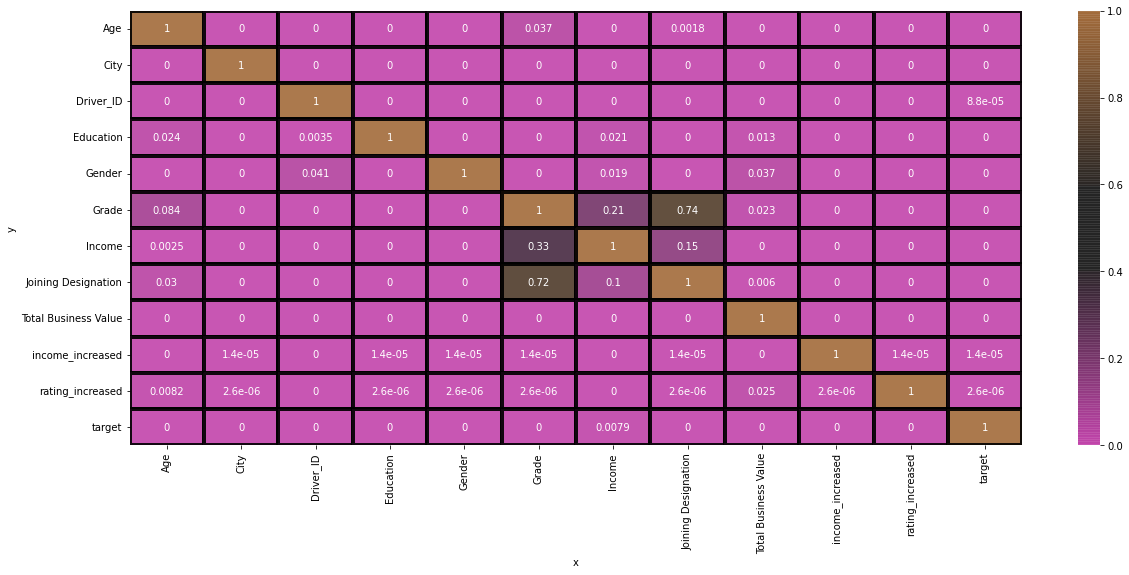

In [ ]:
# Reference: 
# 1. https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598?sk=7ac6697576053896fb27d3356dd6db32
# 2. https://github.com/8080labs/ppscore
plt.figure(figsize=(20, 8))
matrix_df = pps.matrix(df_new)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1,  linewidths=0.5, annot=True, cmap=cmap, **kwargs)

##<font color="red" face="georgia">Observations</font>

1. The PPS between Grade and Joining Designation is high.
2. The PPS between Grade and Income is 0.21.
3. The PPS between Income and Grade is 0.33.
4. The PPS between Joining Designation and Grade is 0.72.

#```Univariate Analysis (Graphical)```

In [ ]:
!pip3 install SciencePlots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# https://github.com/garrettj403/SciencePlots/wiki/Gallery#color-cycles

import scienceplots
import matplotlib
plt.style.use(['science', 'notebook', 'nature'])
plt.rcParams.update({'figure.dpi': '200'})
font = {'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
# plt.rcParams.update({'font.size': 30, 'weight': 'bold'})

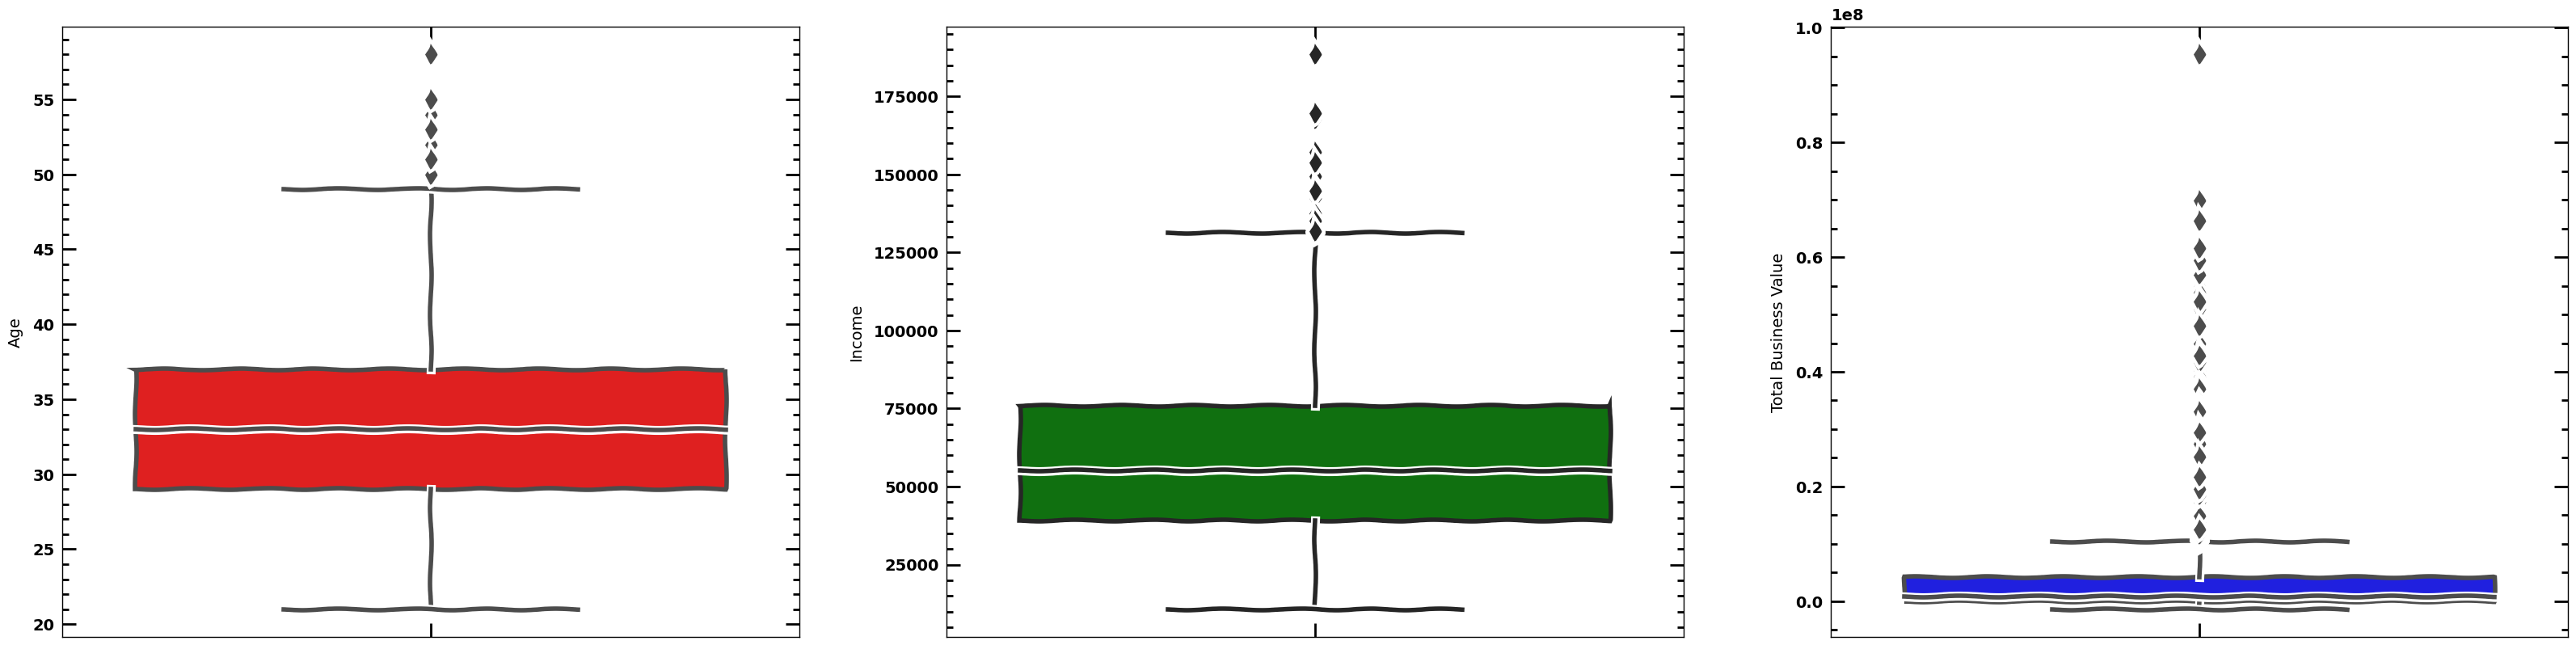

In [ ]:
numerical_columns = ['Age', 'Income', 'Total Business Value']
colors = ['r','g','b']
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
axes = ax.ravel()
with plt.xkcd():
  for index, feature in enumerate(numerical_columns):
    sns.boxplot(data=df_new, y=feature, ax=axes[index], color=colors[index])

#<font color="red" face="georgia">Observations</font>

##```Age```
1. The 50$^{th}$ percentile is approximately 32.5 years old, while the 25$^{th}$ and 75$^{th}$ percentiles are approximately 28 and 37 years old, respectively.
2. There are few outliers in the upper IQR.

##```Income```
1. The median income is roughly 55000 Rs, while the 25$^{th}$ and 75$^{th}$ percentiles lie at 40000 Rs and 75000 Rs, respectively.
2. There are few outliers in the upper IQR.

##```Total Business Value```
1. In total business value, the 25$^{th}$ and 50$^{th}$ percentiles are very close to each other. The 75$^{th}$ percentile is roughly 0.4*10$^{8}$. 
2. There are huge number of outliers at the upper IQR.

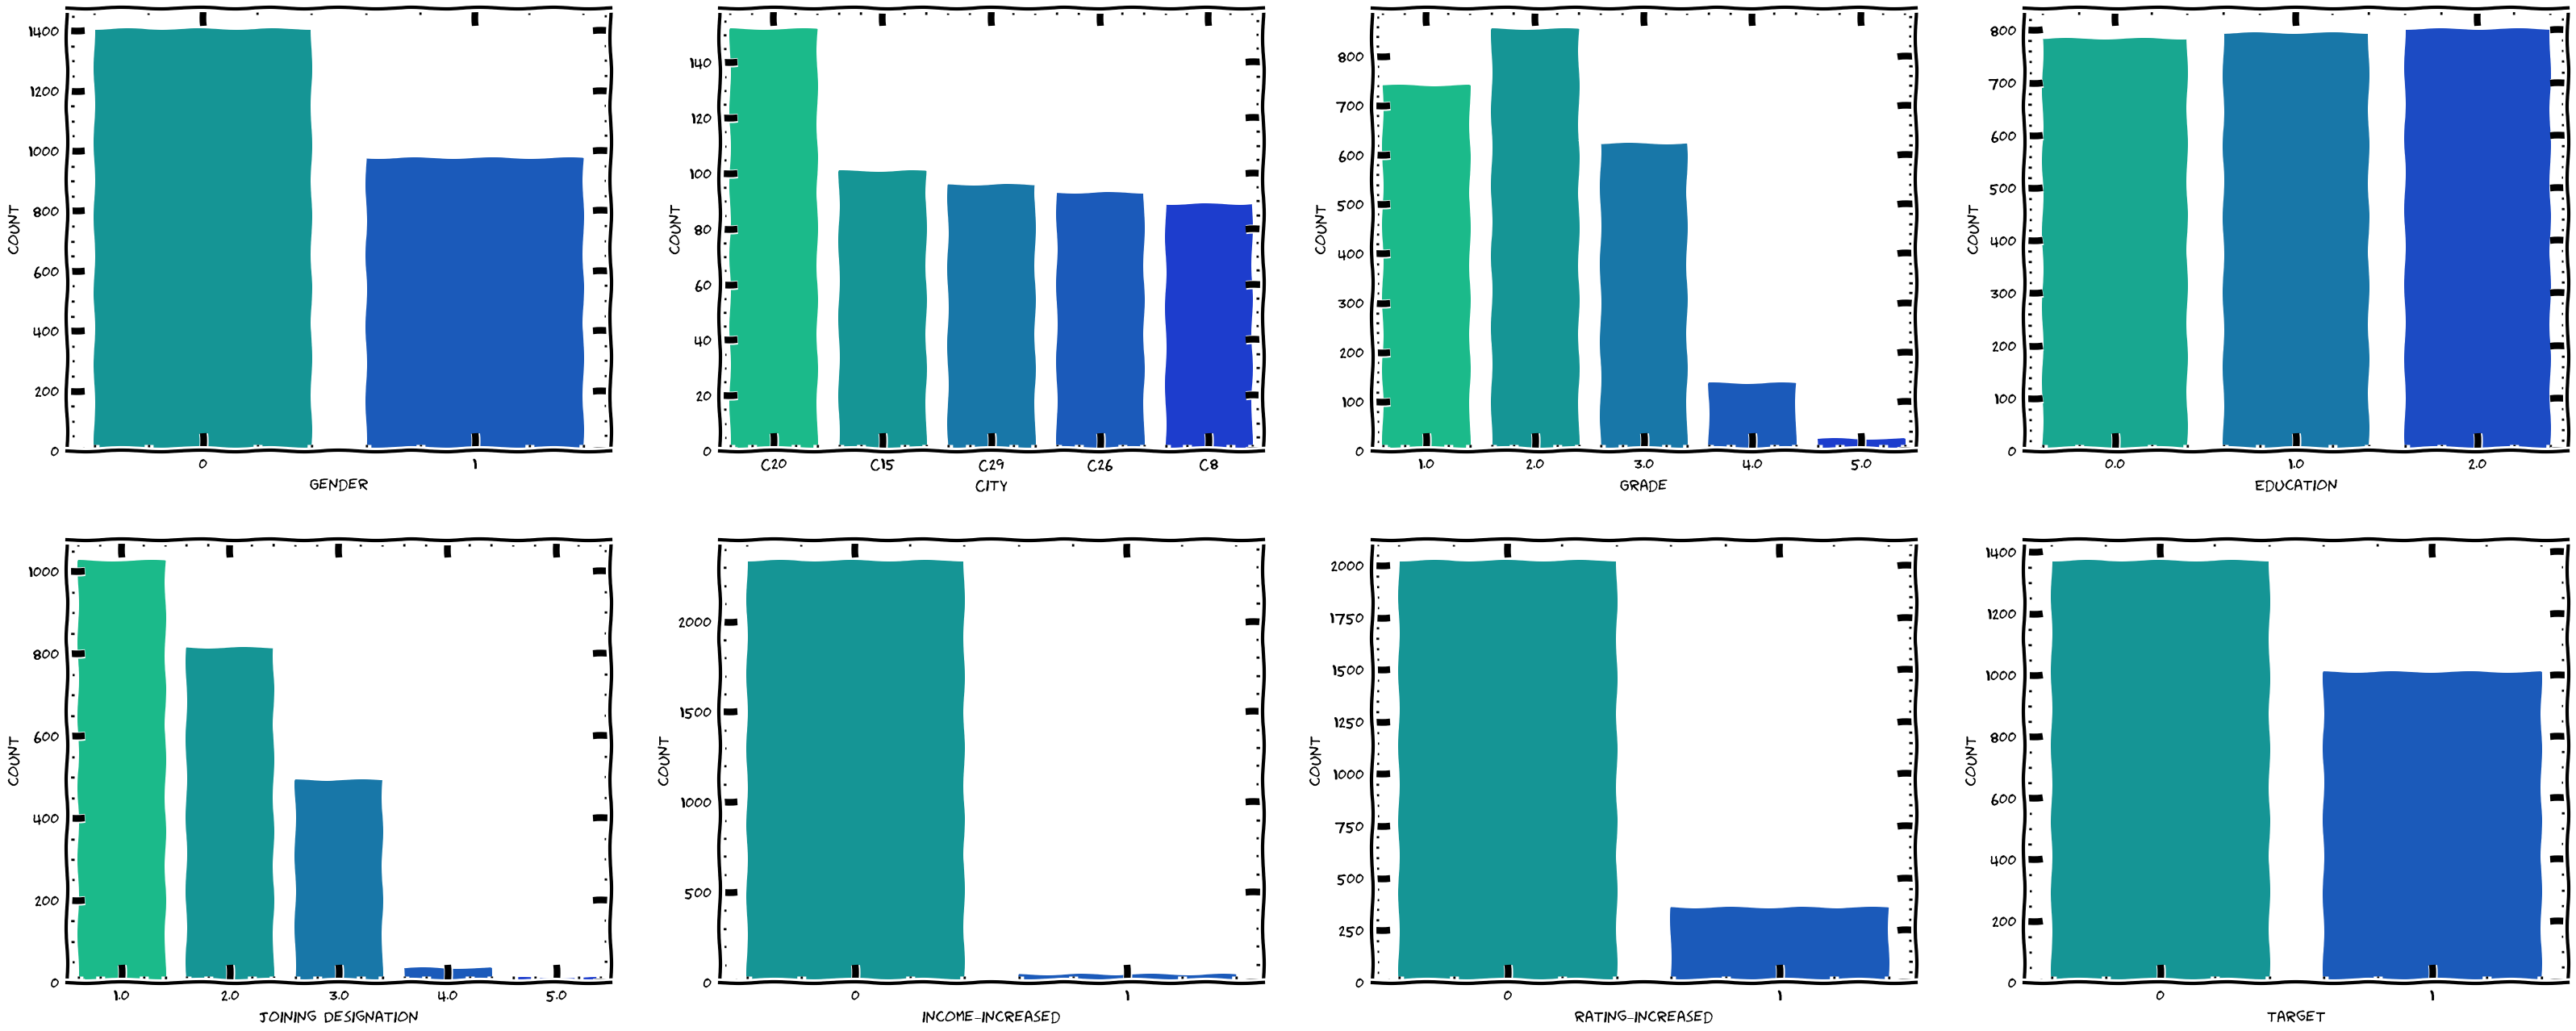

In [ ]:
categorical_columns = ['Gender', 'City', 'Grade', 'Education', 
                       'Joining Designation', 'income_increased', 'rating_increased', 'target']
colors = ['r','g','b','y','c']
with plt.xkcd():
  fig, ax = plt.subplots(2, 4, figsize=(20, 8))
  axes = ax.ravel()
  for index, feature in enumerate(categorical_columns):
    number = np.random.randint(0, len(colors))
    if len(df_new[feature].unique()) > 5:
      sns.countplot(data=df_new, x=feature, ax=axes[index], color=colors[number], 
                    order=df_new[feature].value_counts().index[:5], palette="winter_r")
    else:
      sns.countplot(data=df_new, x=feature, ax=axes[index], color=colors[number], palette="winter_r")  

#<font color="red" face="georgia">Observations</font>

1. There are approximately 1400 male drivers for every 1000 female drivers.
2. The majority of the drivers have C20 as their city code, followed by C15 & C29, respectively.
3. The majority of the drivers had a grade of 2.0, followed by 1.0 at the time of joining.
4. The education levels of the drivers are equally distributed.
5. The majority of the drivers started with a designation level of 1, followed by level 2.
6. There is a huge imbalance between income increases among the drivers, meaning very few have increased their income.
7. Very few drivers have their ratings increased.
8. There is a slight imbalance between the drivers who churned out and those who didn't.

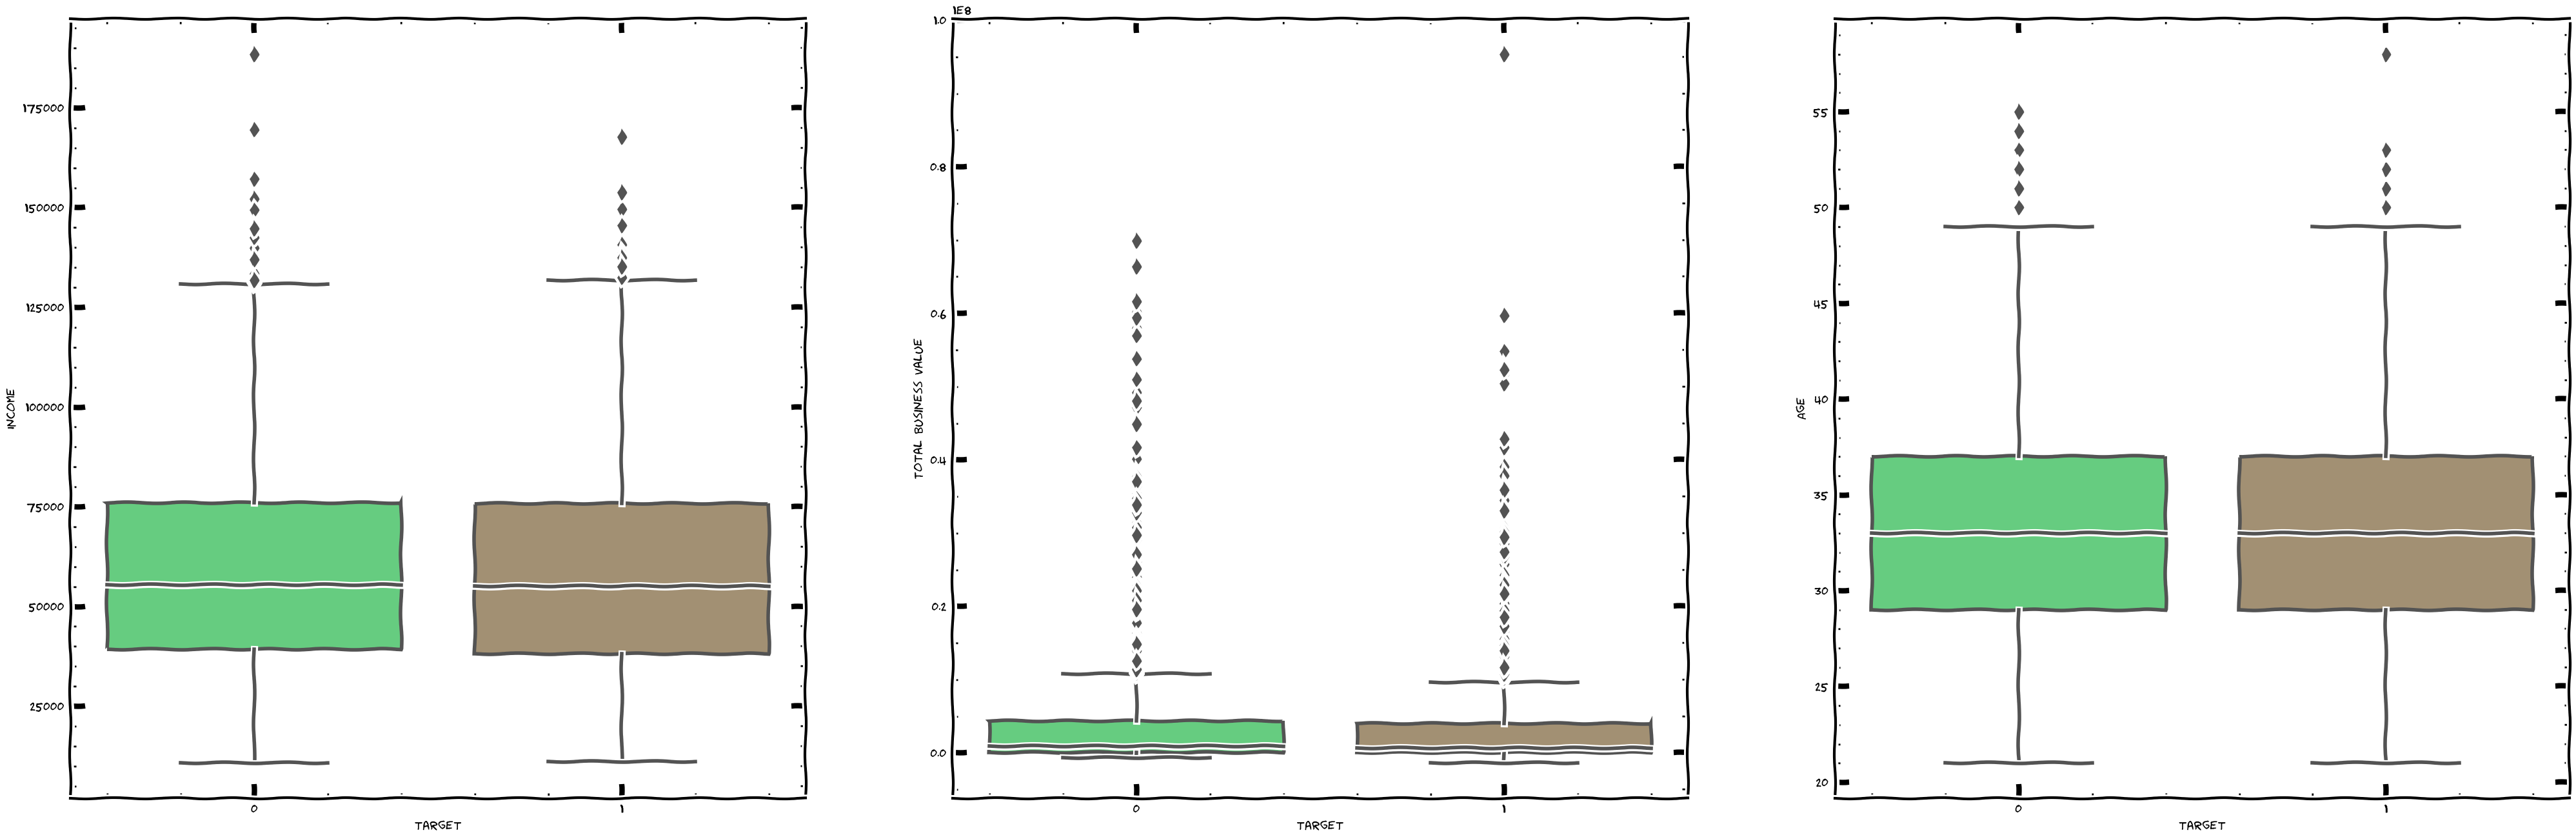

In [ ]:
columns = ['Income', 'Total Business Value', 'Age']
with plt.xkcd():
  fig, ax = plt.subplots(1, 3, figsize=(25, 8))
  axes = ax.ravel()
  for index, column in enumerate(columns):
    sns.boxplot(data=df_new, y=column, x="target", ax=axes[index], palette="terrain")

#<font color="red" face="georgia">Observations</font>

1. The income distributions of both target variables are roughly equal, with outliers in the upper IQR.
2. The total business value distributions of both target variables are roughly equal, with many outliers in the upper IQR.
3. The age distributions of both target variables are roughly equal, with few outliers in the upper IQR.

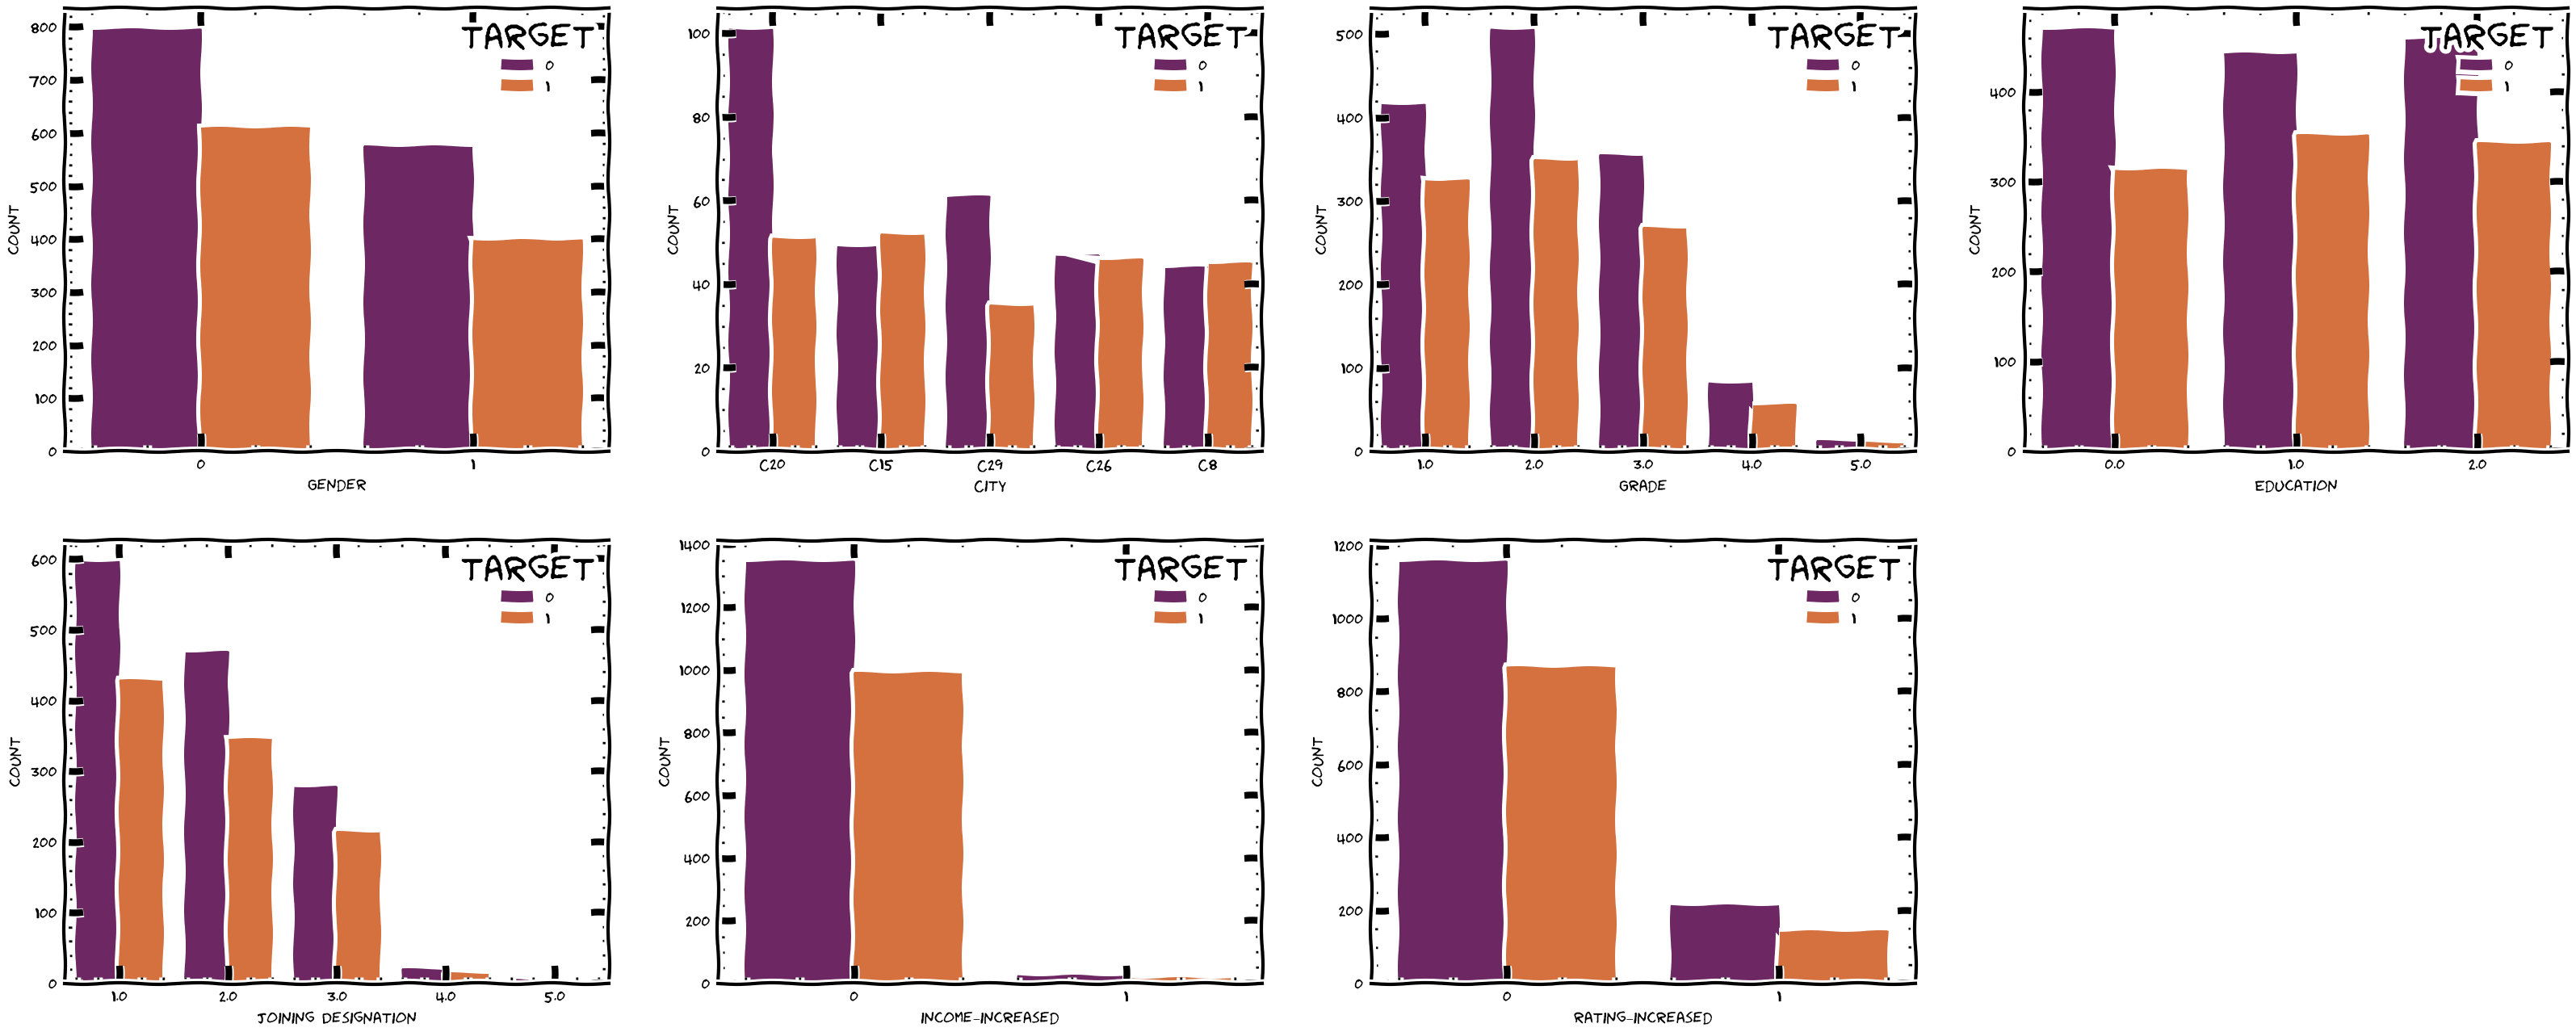

In [ ]:
categorical_columns = ['Gender', 'City', 'Grade', 'Education', 
                       'Joining Designation', 'income_increased', 'rating_increased']
colors = ['r','g','b','y','c']
with plt.xkcd():
  fig, ax = plt.subplots(2, 4, figsize=(20, 8))
  axes = ax.ravel()
  for index, feature in enumerate(categorical_columns):
    number = np.random.randint(0, len(colors))
    if len(df_new[feature].unique()) > 5:
      sns.countplot(data=df_new, x=feature, ax=axes[index], color=colors[number], 
                    order=df_new[feature].value_counts().index[:5], palette="inferno",
                    hue="target")
    else:
      sns.countplot(data=df_new, x=feature, ax=axes[index], color=colors[number], palette="inferno", hue="target")

fig.delaxes(ax[1,3])

#<font color="red" face="georgia">Observations</font>

1. Approximately 800 male drivers didn't churn out, and nearly 590 female drivers didn't churn out.
2. City code C20 has the highest retention of drivers, followed by C29. The retention and attrition rates are nearly identical in C8.
3. Drivers with a grade of 2.0 have the highest attrition rate, followed by grade 1. Grade 5 has an equal number of attrition and retention rates.
4. The attrition rate among the drivers with 12+ and graduates is nearly equal. Drivers with 10+ education have the highest retention rate.
5. The drivers who, at the time of joining, had a designation of 1 have the highest retention and attrition rates, followed by those with a designation of 2.
6. Strangely, the drivers whose income didn't increase have the highest attrition and retention rates.
7. The ratio of rating increases for both churned and non-churned is nearly identical.

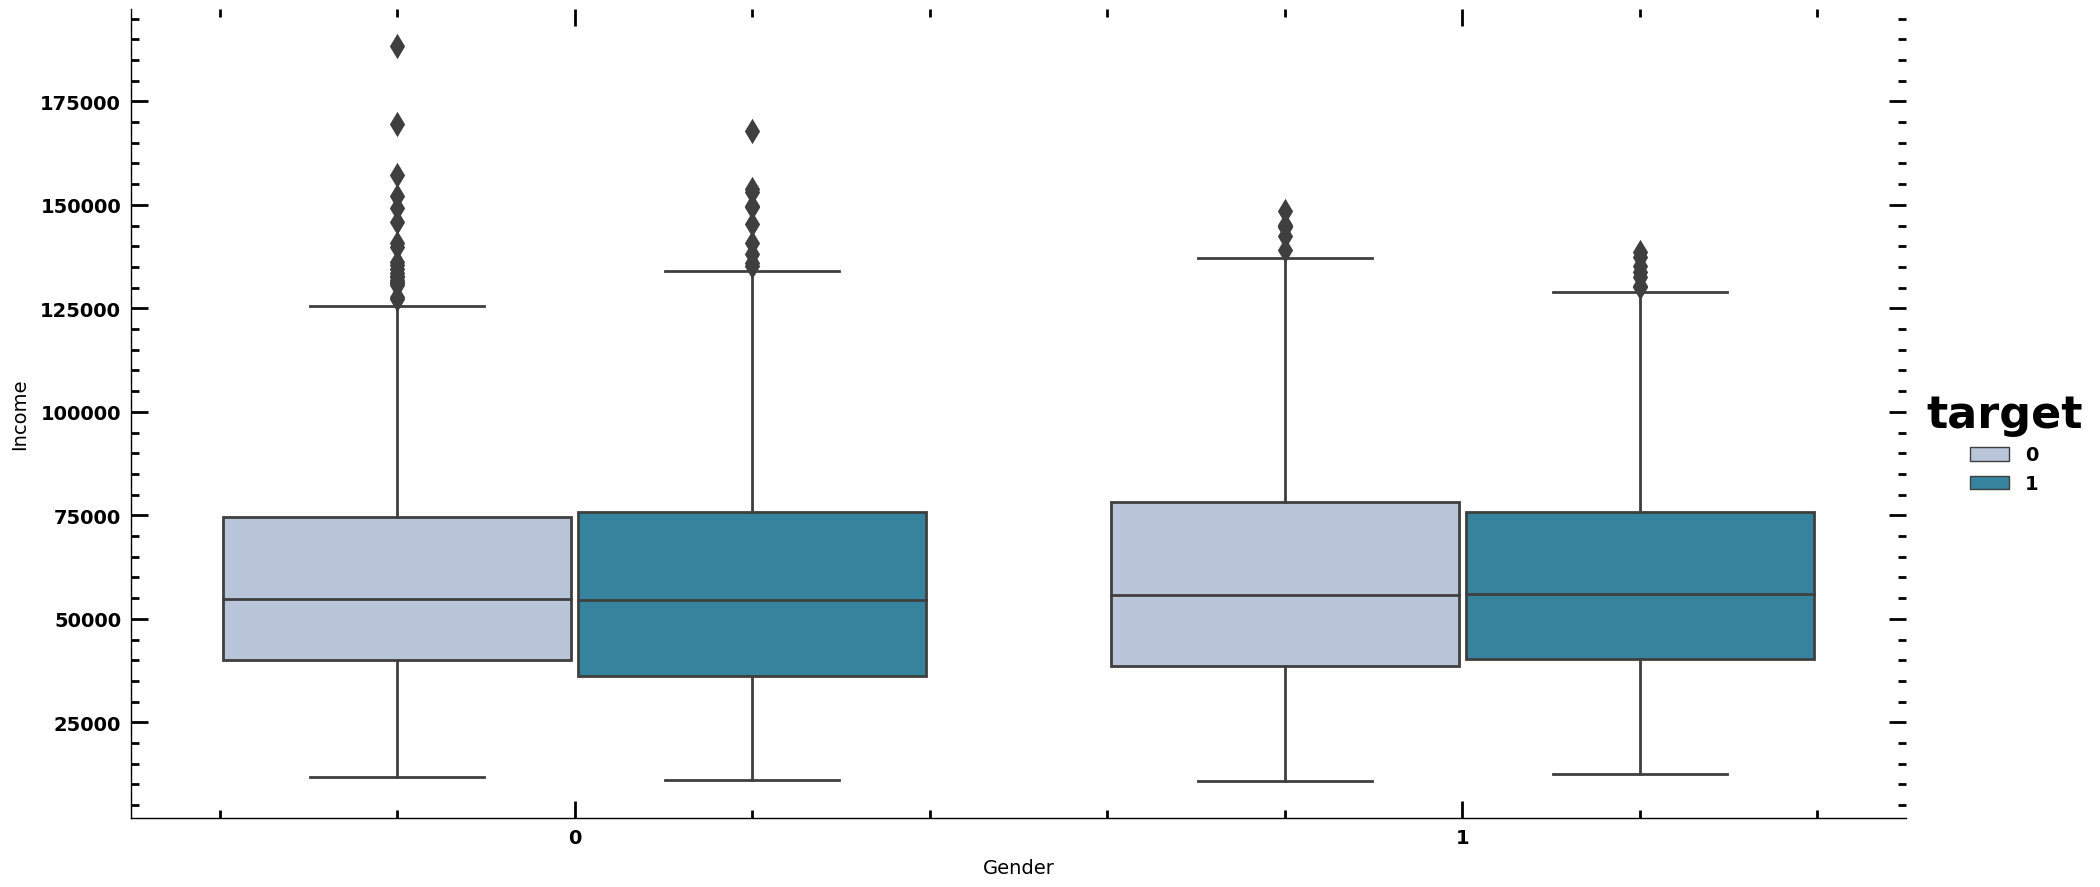

In [ ]:
sns.catplot(data=df_new, x="Gender", y="Income", 
            hue="target", kind="box", palette="PuBuGn", aspect=2)
plt.show()

#<font color="red" face="georgia">Observations</font>

The income distribution among male and female drivers is nearly equal for both churn and non-churn groups, with outliers in the upper IQR.

/usr/local/lib/python3.8/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


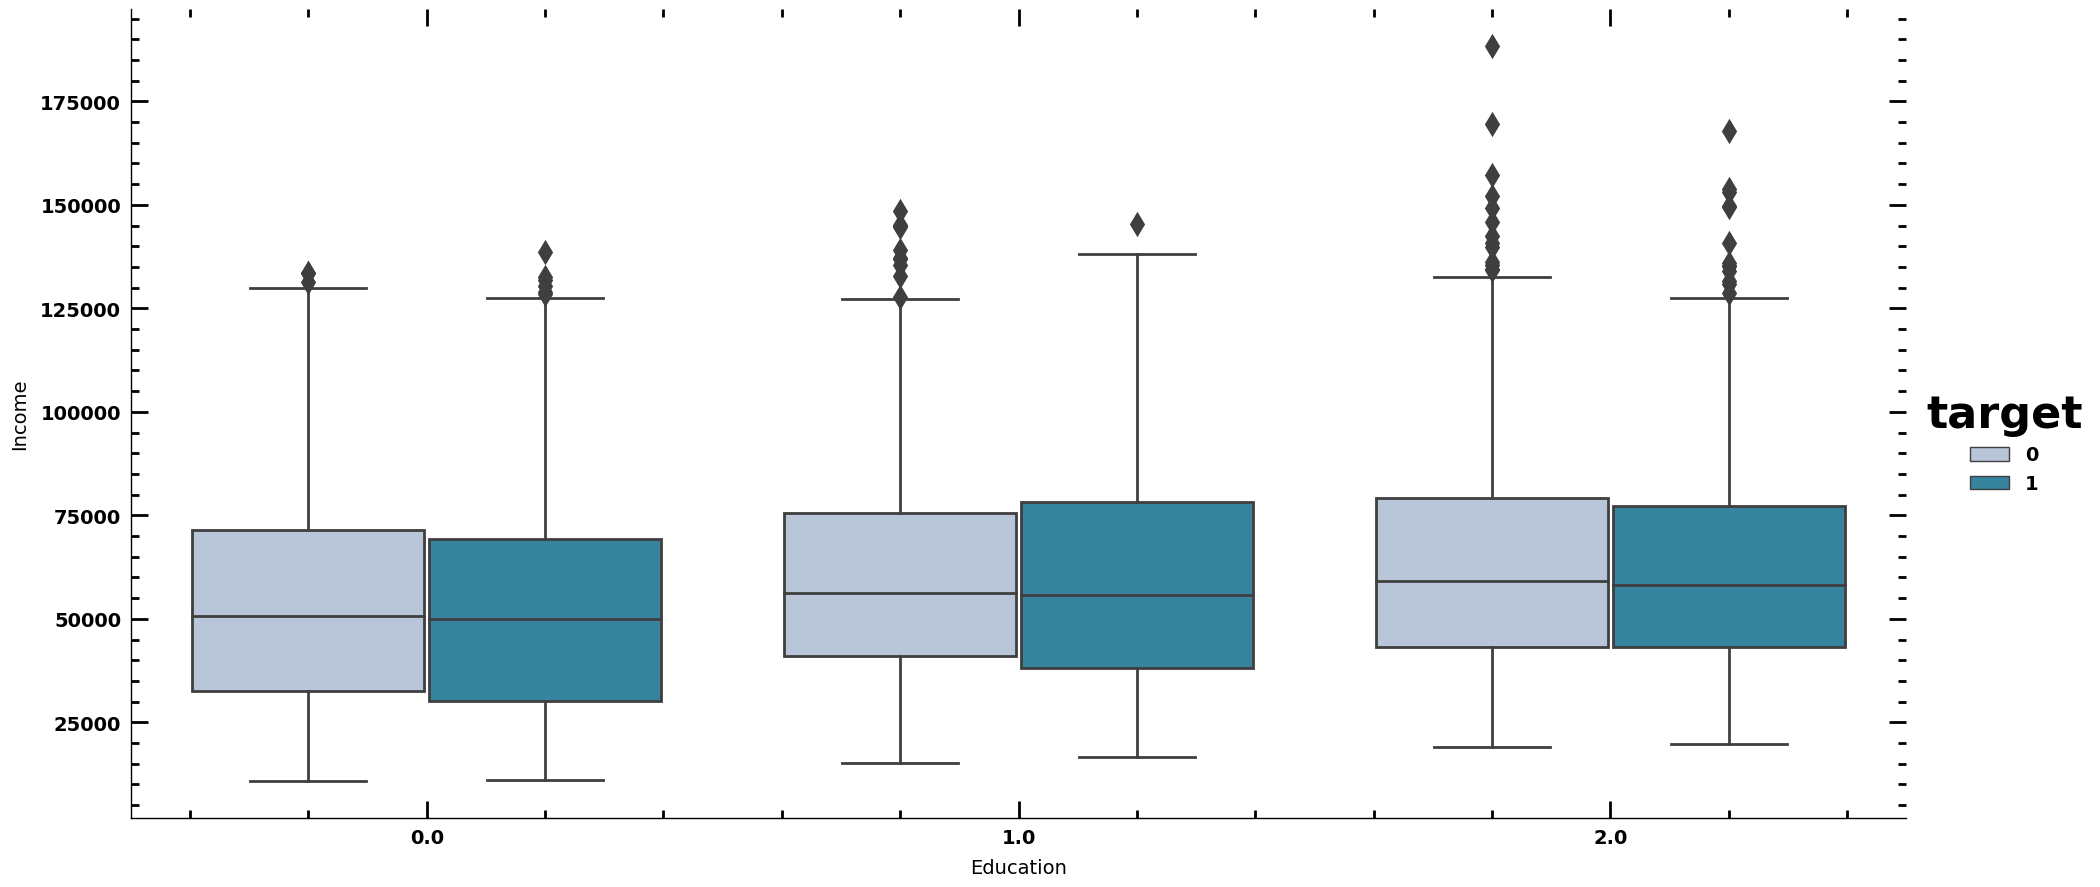

In [ ]:
sns.catplot(data=df_new, x="Education", y="Income", 
            hue="target", kind="box", palette="PuBuGn", aspect=2)
plt.show()

#<font color="red" face="georgia">Observations</font>

The income distribution among different education levels is nearly equal for both churn and non-churn groups, with outliers in the upper IQR.

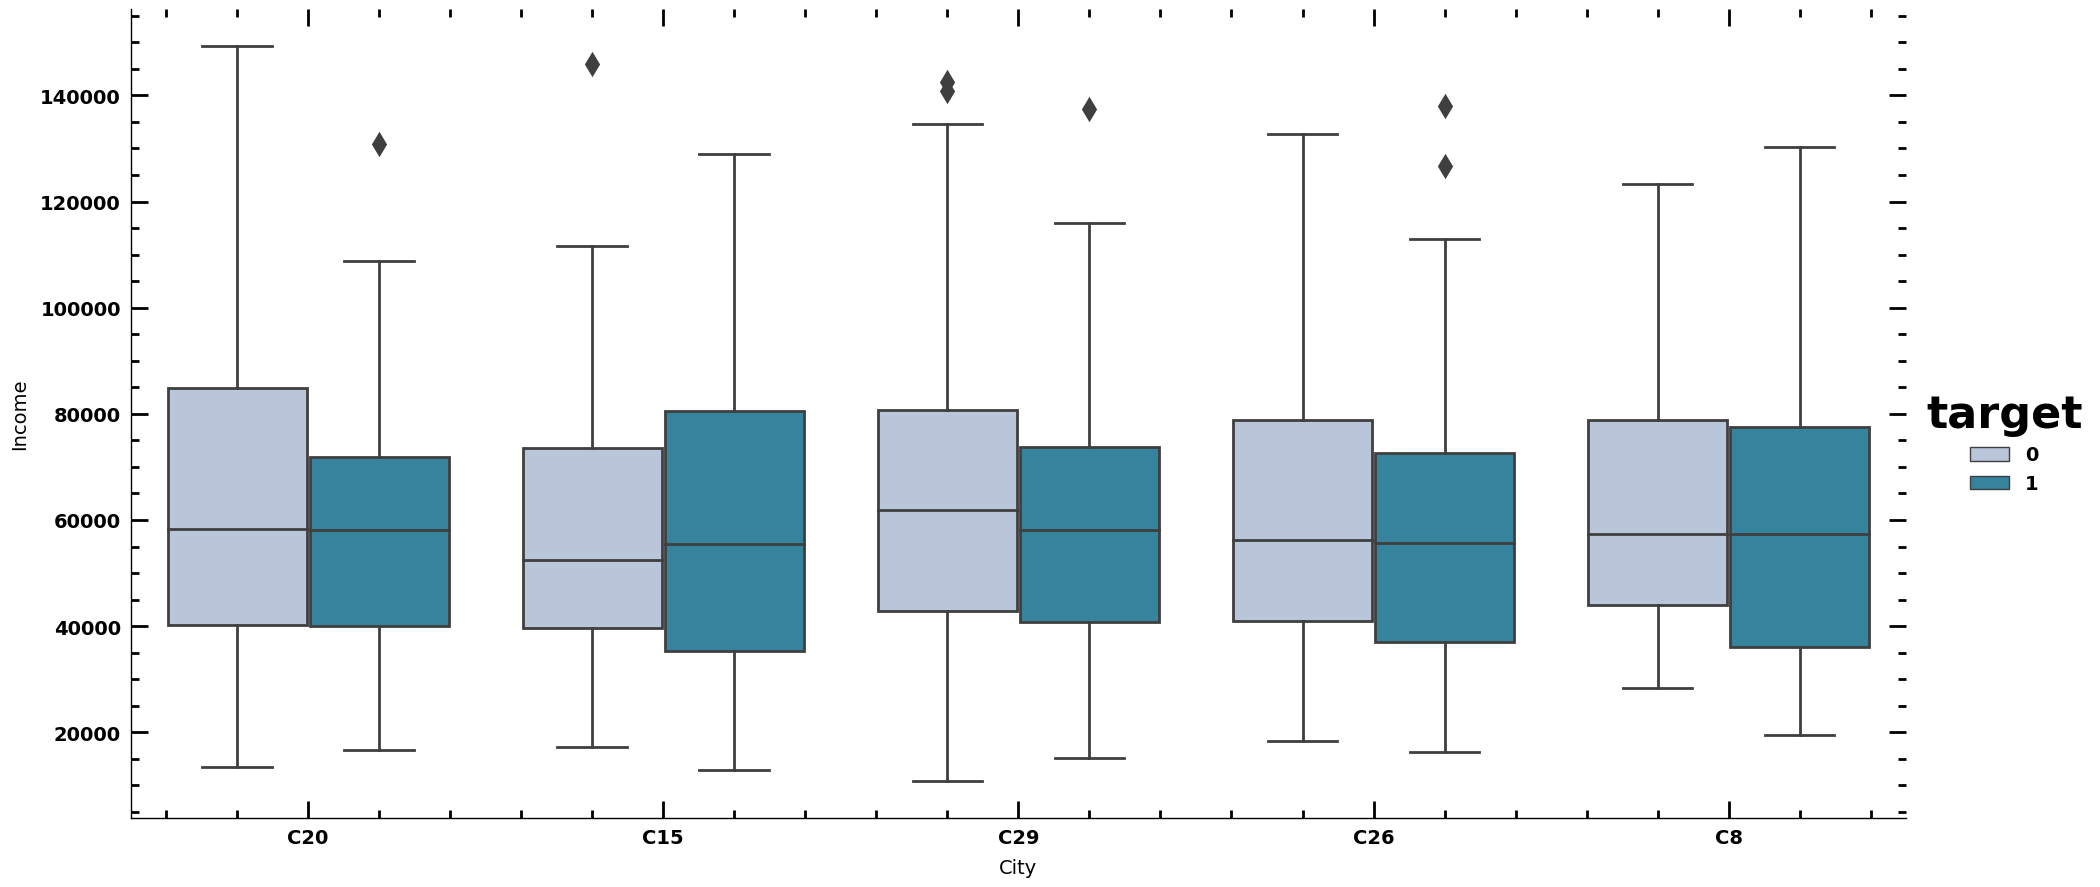

In [ ]:
sns.catplot(data=df_new, x="City", y="Income", 
            hue="target", kind="box", palette="PuBuGn", aspect=2,
            order=df_new["City"].value_counts().index[:5],)
plt.show()

#<font color="red" face="georgia">Observations</font>

1. The median income among different city codes is nearly equal for both churn and non-churn groups.
2. The non-churned group for city code C20 has no outliers.
3. There are no outliers for city code C8 for the churned and non-churned groups.
4. The churned group for city code C15 has no outliers.

<Figure size 4000x1600 with 0 Axes>

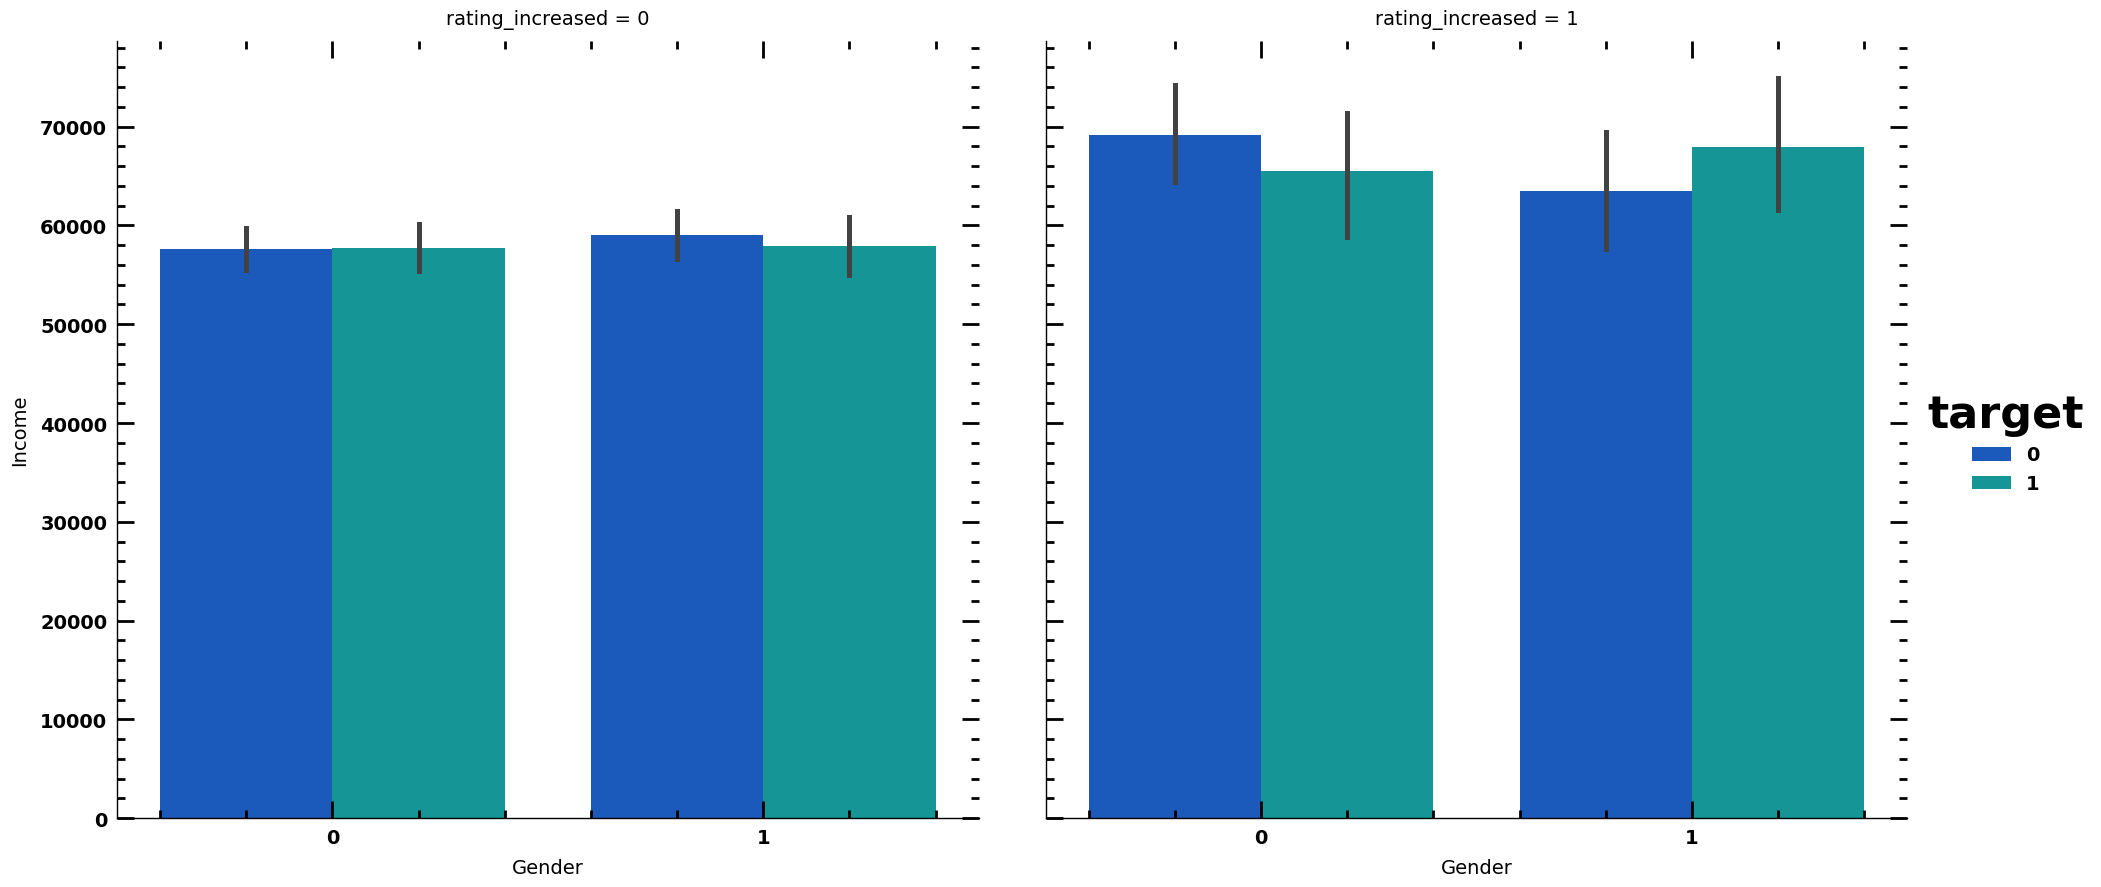

In [ ]:
# Income by gender by product and by marital status
plt.figure(figsize=(20, 8))
sns.catplot(x='Gender',y='Income', hue='target', col="rating_increased", data=df_new, kind='bar', palette='winter')
plt.show()

#<font color="red" face="georgia">Observations</font>

When rating_increased=1, the number of churned and non-churned drivers is higher than when rating_increased=0.

<Figure size 4000x1600 with 0 Axes>

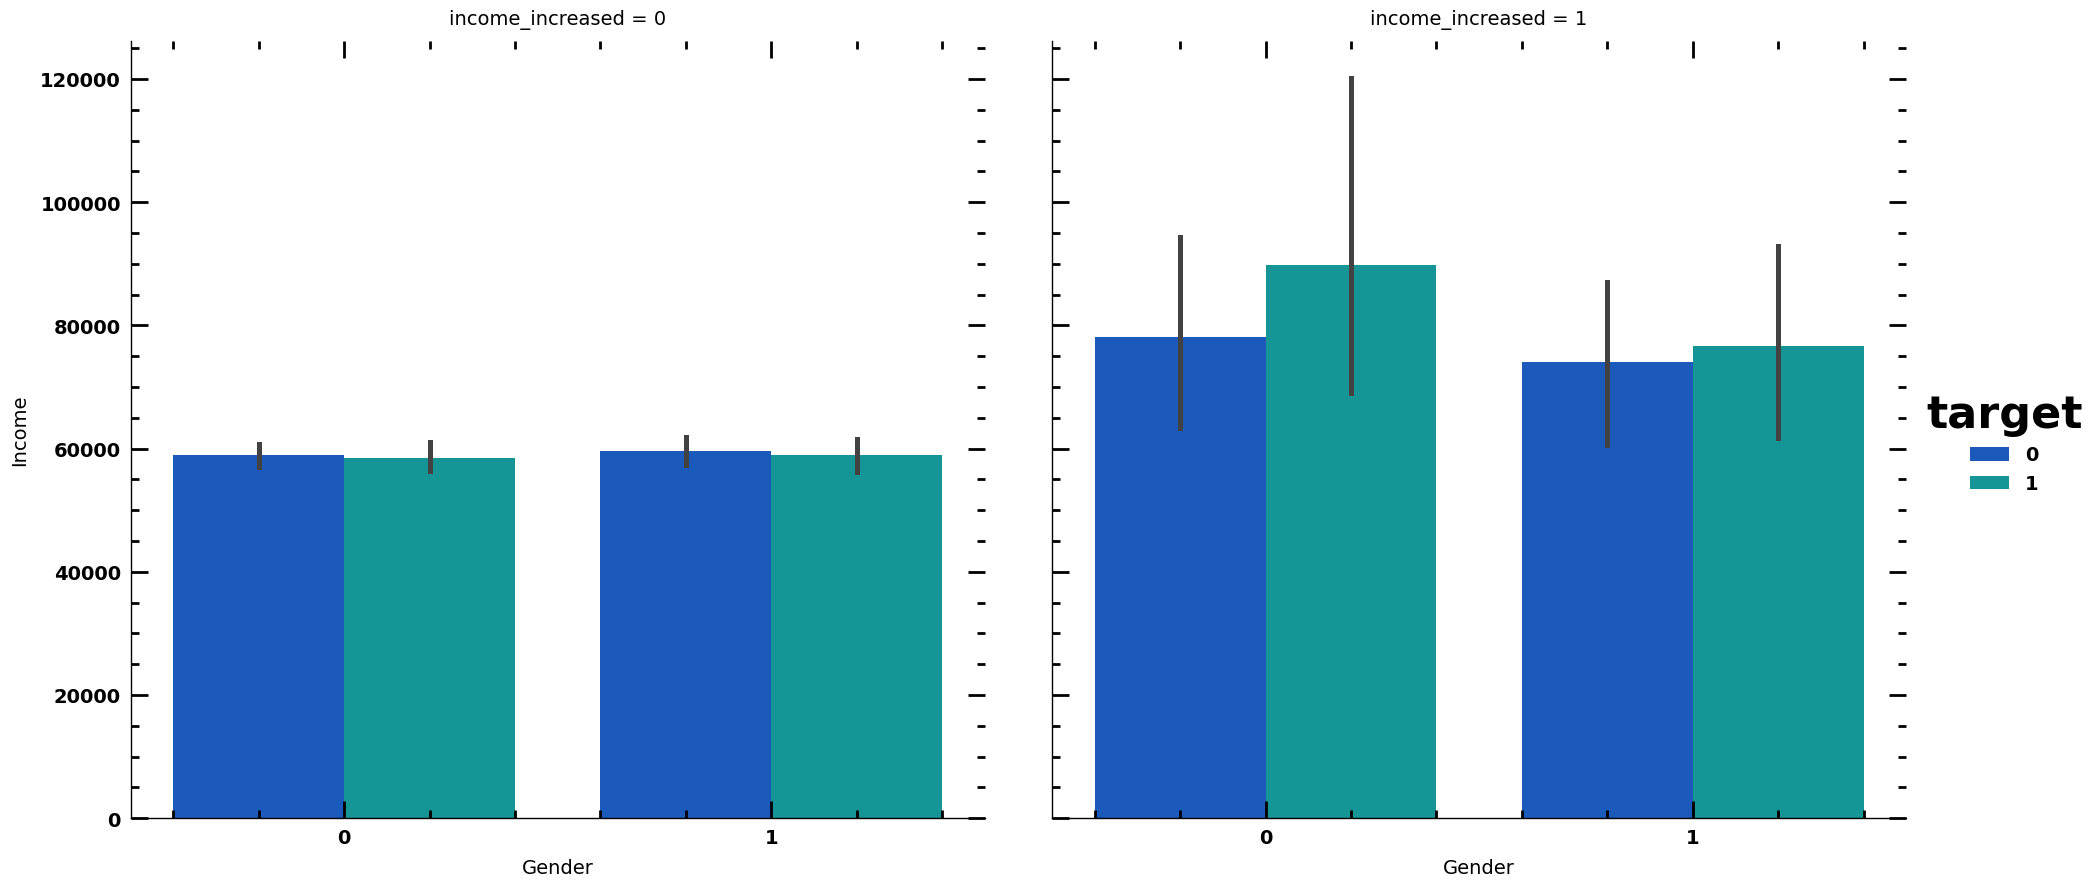

In [ ]:
# Income by gender by product and by marital status
plt.figure(figsize=(20, 8))
sns.catplot(x='Gender',y='Income', hue='target', col="income_increased", data=df_new, kind='bar', palette='winter')
plt.show()

#<font color="red" face="georgia">Observations</font>

1. The male/female driver ratio is nearly identical for churned and non-churned groups when income_increased=0. 
2. For income_increased=1, the ratio of male/female drivers for non-churned group is higher than churned group.

#```Outlier Handling```

In [ ]:
df_new_copy = df_new.copy()

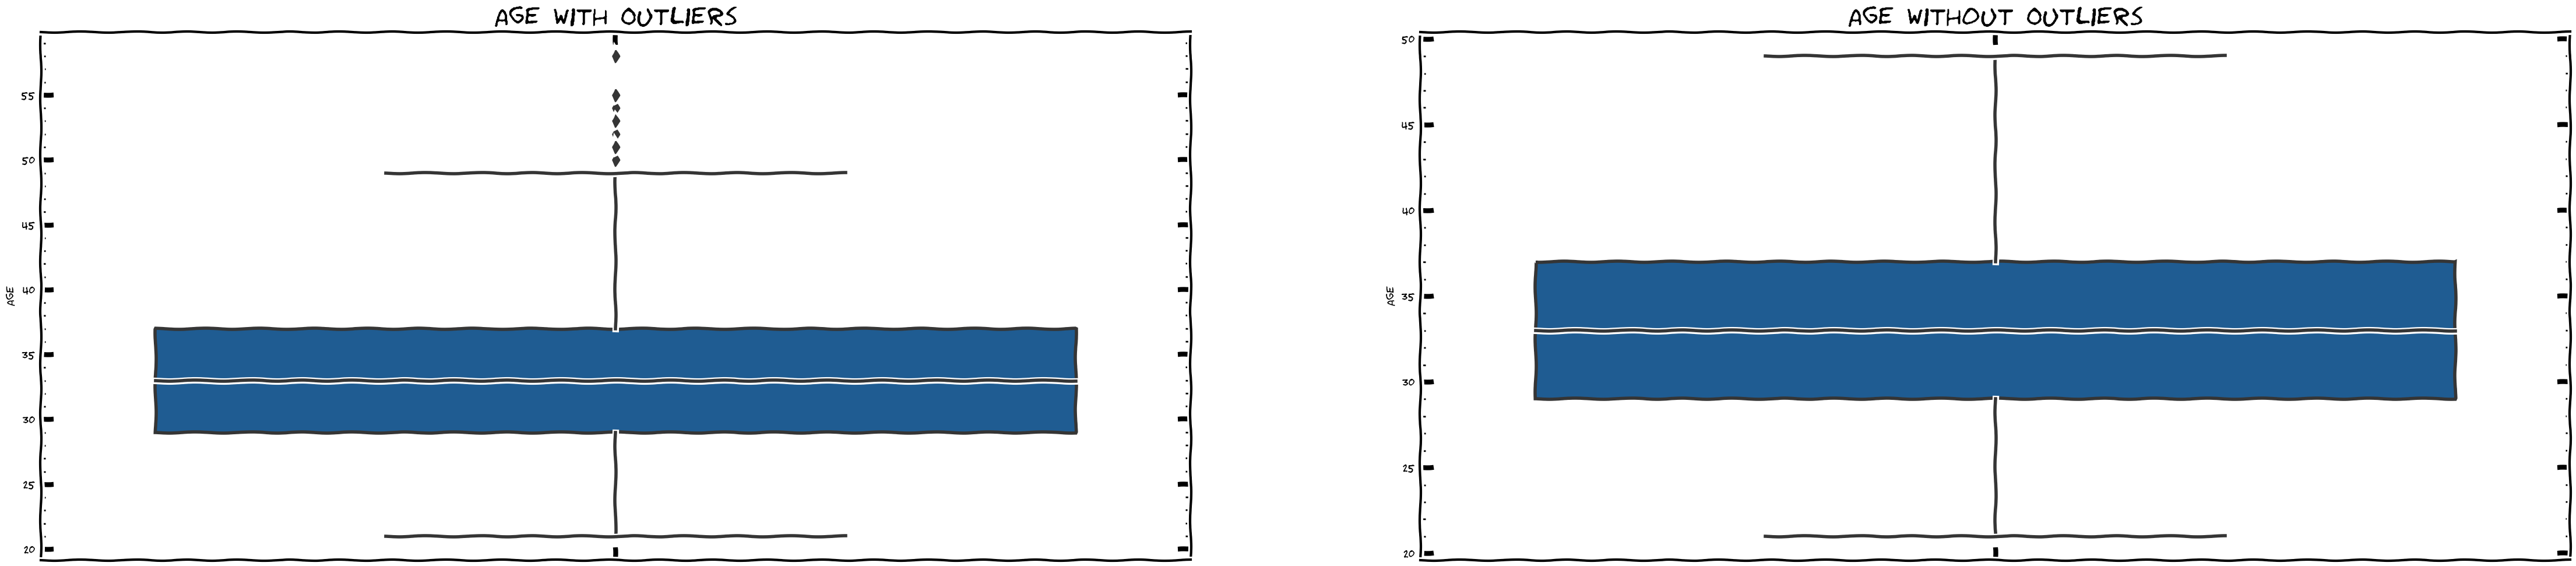

In [ ]:
p98_9, p0 = np.percentile(df_new['Age'].values, [98.9, 0])

df_outlier_treatment = df_new.copy()
df_outlier_treatment['Age'] = np.clip(df_outlier_treatment['Age'].values, p0, p98_9)

with plt.xkcd():
  fig, ax = plt.subplots(1, 2, figsize=(28, 6))
  axes = ax.ravel()    
  sns.boxplot(data=df_new, y="Age", ax=axes[0])
  axes[0].set_title("Age with Outliers")

  sns.boxplot(data=df_outlier_treatment, y="Age", ax=axes[1])
  axes[1].set_title("Age without Outliers")
  plt.show()

df_new['Age'] = np.clip(df_new['Age'].values, p0, p98_9)

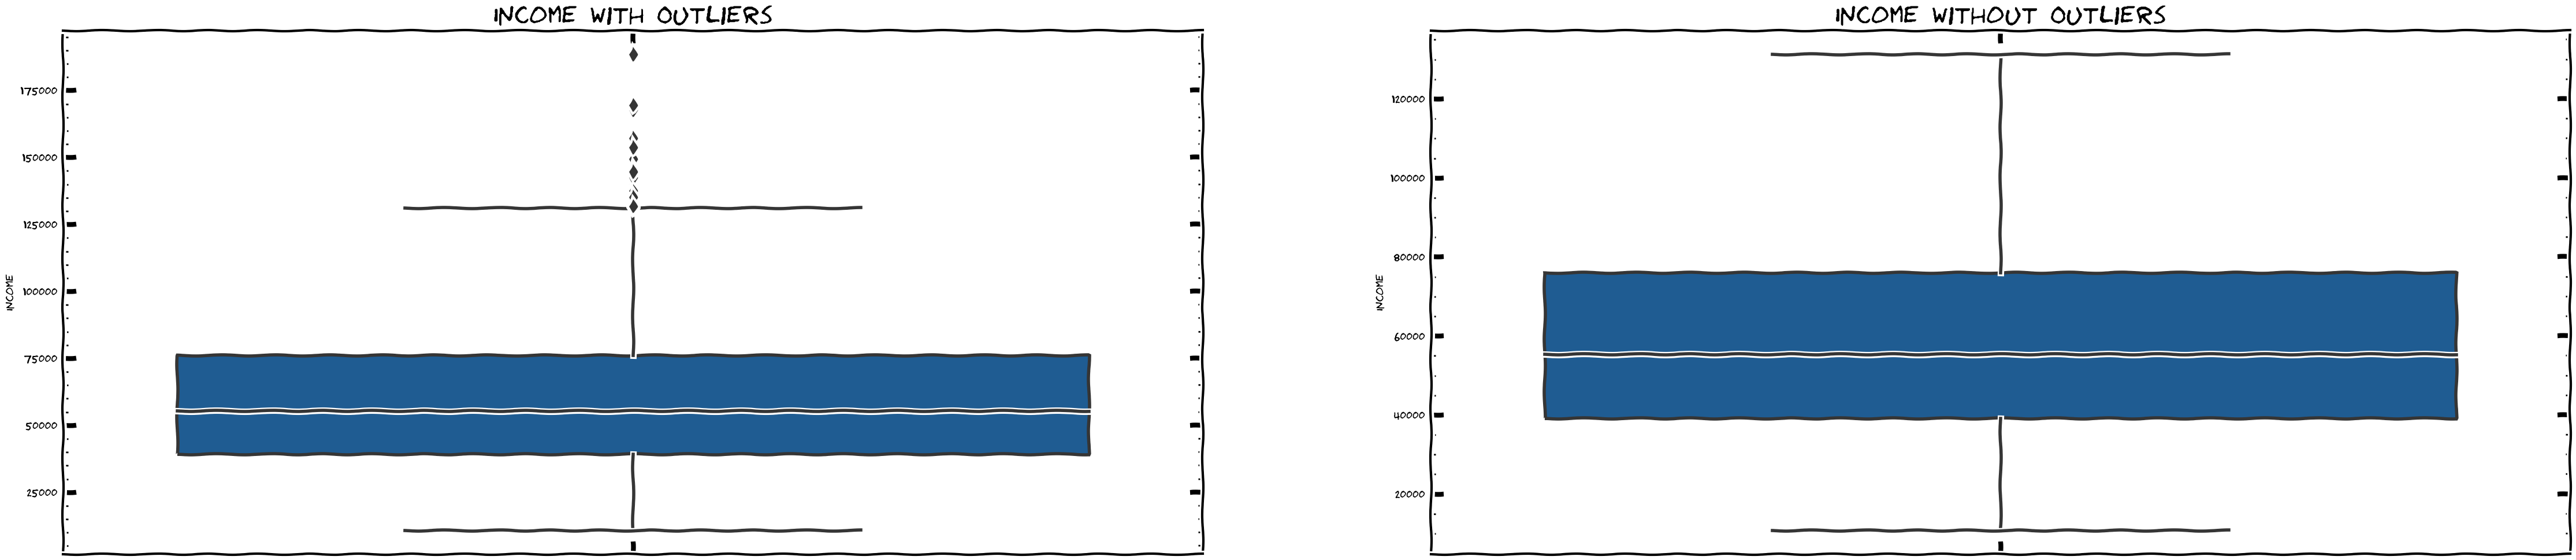

In [ ]:
p98, p0 = np.percentile(df_new['Income'].values, [98, 0])

df_outlier_treatment = df_new.copy()
df_outlier_treatment['Income'] = np.clip(df_outlier_treatment['Income'].values, p0, p98)

with plt.xkcd():
  fig, ax = plt.subplots(1, 2, figsize=(28, 6))
  axes = ax.ravel()    
  sns.boxplot(data=df_new, y="Income", ax=axes[0])
  axes[0].set_title("Income with Outliers")

  sns.boxplot(data=df_outlier_treatment, y="Income", ax=axes[1])
  axes[1].set_title("Income without Outliers")
  plt.show()

df_new['Income'] = np.clip(df_new['Income'].values, p0, p98)

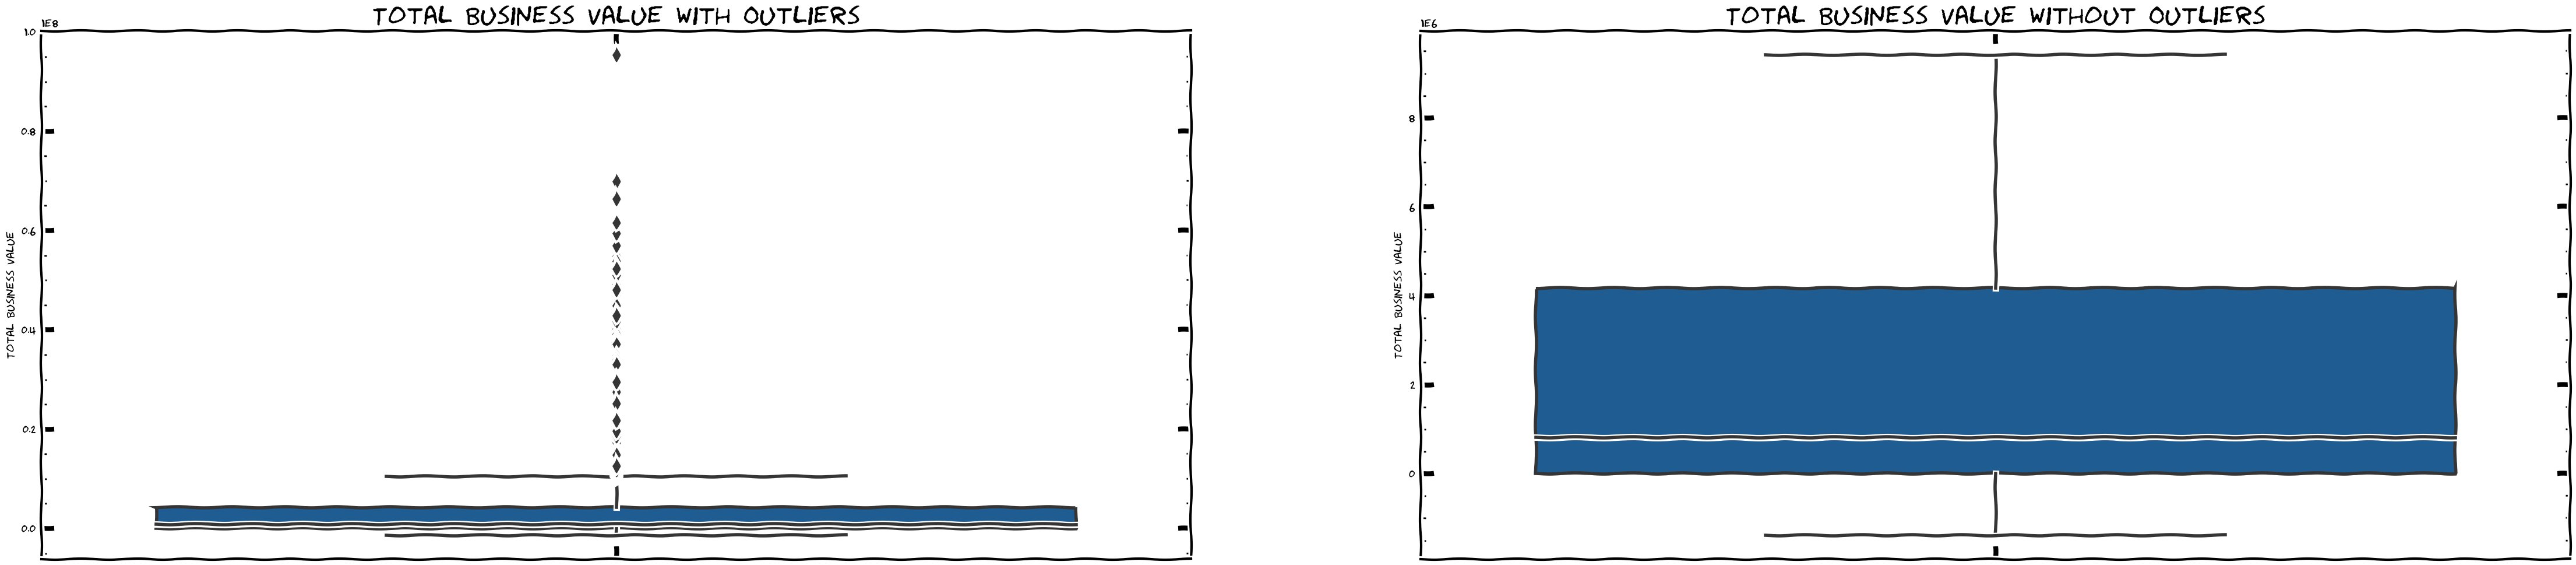

In [ ]:
p85, p0 = np.percentile(df_new['Total Business Value'].values, [85, 0])

df_outlier_treatment = df_new.copy()
df_outlier_treatment['Total Business Value'] = np.clip(df_outlier_treatment['Total Business Value'].values, p0, p85)

with plt.xkcd():
  fig, ax = plt.subplots(1, 2, figsize=(28, 6))
  axes = ax.ravel()    
  sns.boxplot(data=df_new, y="Total Business Value", ax=axes[0])
  axes[0].set_title("Total Business Value with Outliers")

  sns.boxplot(data=df_outlier_treatment, y="Total Business Value", ax=axes[1])
  axes[1].set_title("Total Business Value without Outliers")
  plt.show()

df_new['Total Business Value'] = np.clip(df_new['Total Business Value'].values, p0, p85)

#```Train - Test Split```

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

In [ ]:
df.dtypes

Driver_ID                        int64
MMM-YY                  datetime64[ns]
City                            object
Dateofjoining           datetime64[ns]
LastWorkingDate         datetime64[ns]
Age                            float64
Gender                         float64
Education_Level                float64
Income                         float64
Grade                          float64
Joining Designation            float64
Total Business Value           float64
Quarterly Rating               float64
dtype: object

In [ ]:
features = df_new.drop('target', axis=1)
label = df_new['target'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(features, label, stratify=label, random_state=42)

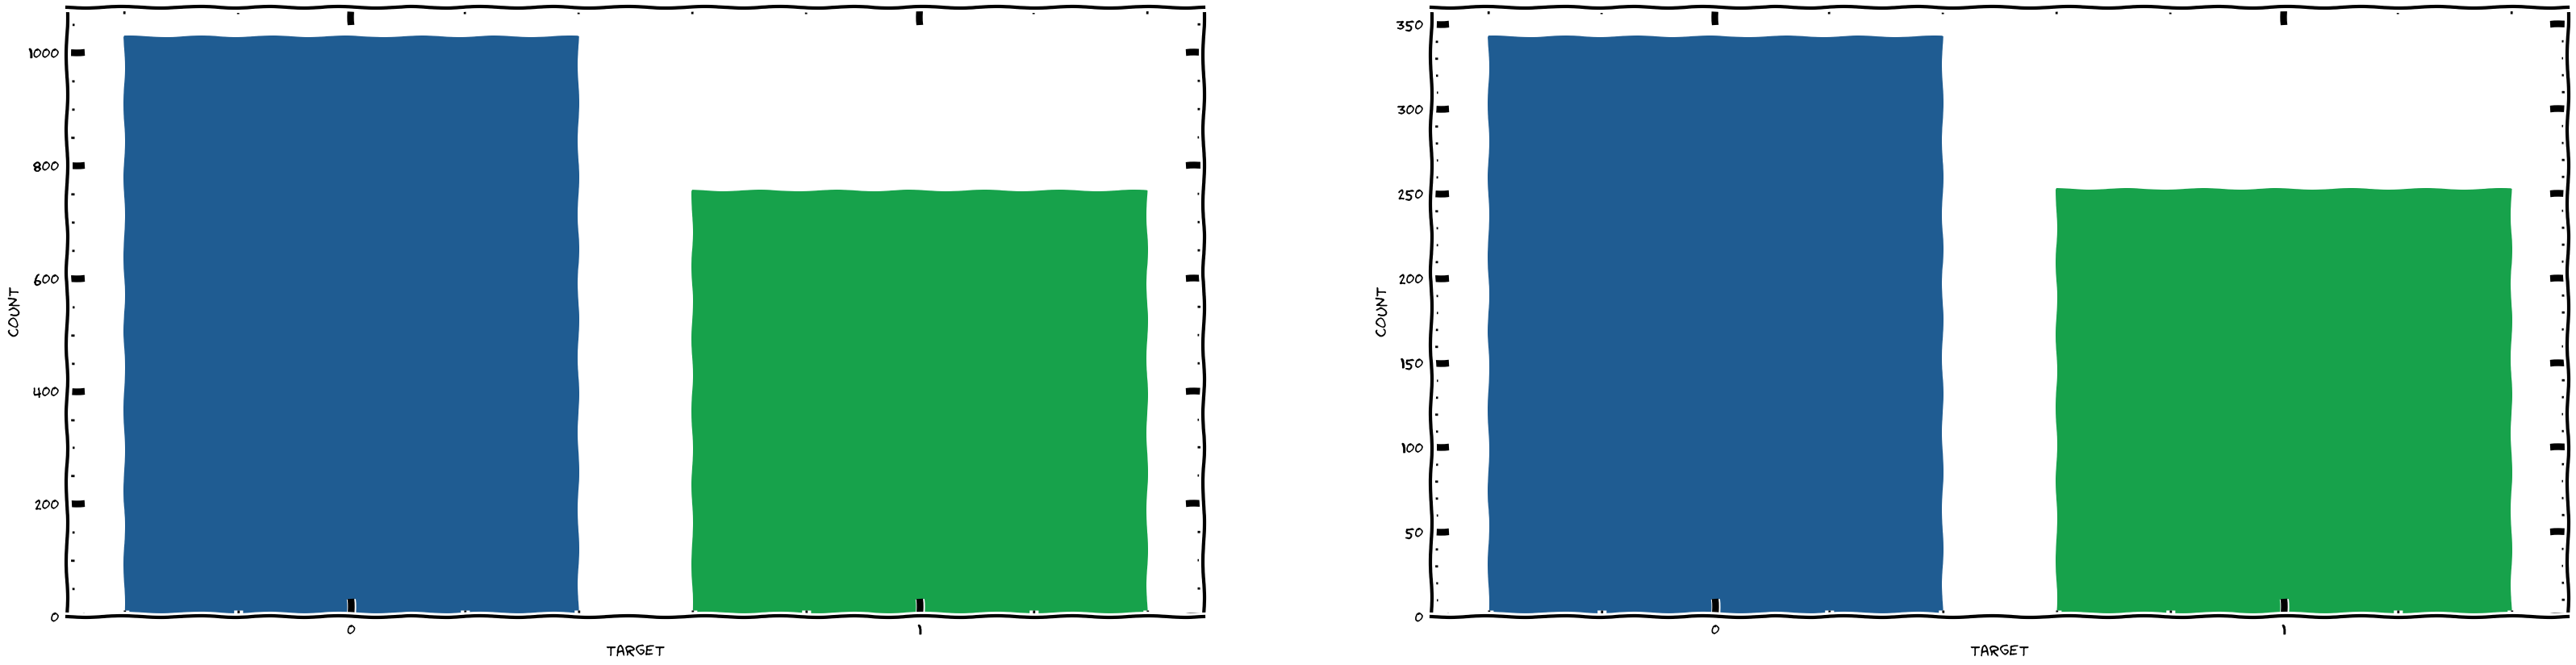

In [ ]:
with plt.xkcd():
  fig, ax = plt.subplots(1, 2, figsize=(20, 5))
  axes = ax.ravel()

  sns.countplot(x=y_train, ax=axes[0])
  sns.countplot(x=y_test, ax=axes[1])
  plt.show()

As we can see that, dataset is imbalanced.

#```Feature Engineering - 2```

In [ ]:
df_new.columns

Index(['Driver_ID', 'Age', 'Gender', 'City', 'Education', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'rating_increased', 'target', 'income_increased'],
      dtype='object')

In [ ]:
!python3 -m pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 5.0 MB/s eta 0:00:00


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from category_encoders.target_encoder import TargetEncoder
from category_encoders.woe import WOEEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder
from imblearn.over_sampling import SMOTE

numerical_column = ['Age', 'Income', 'Total Business Value']
categorical_column = ['City', 'Education', 'Joining Designation', 'Grade', 'Gender', 'rating_increased', 'income_increased']
# categorical_column = ['City', 'Education', 'Joining Designation', 'Grade']

# Here, I am using TargetEncoding not OneHotEncoder for this reason - 
# https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769
transformer = make_column_transformer(
    (StandardScaler(), numerical_column),
    # (MinMaxScaler(), numerical_column),
    (TargetEncoder(smoothing=5), categorical_column)
    # (LeaveOneOutEncoder(sigma=0.2), categorical_column)
)

X_train_preprocessed = transformer.fit_transform(X_train, y_train)
X_test_preprocessed = transformer.transform(X_test)

X_train_preprocessed = pd.DataFrame(X_train_preprocessed, columns=numerical_column + categorical_column)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed, columns=numerical_column + categorical_column)

# X_train_preprocessed = pd.DataFrame(X_train_preprocesse

#```Class Imbalance Treatment```

In [ ]:
sm = SMOTE(random_state=42, n_jobs=-1)
X_train_res, y_train_res = sm.fit_resample(X_train_preprocessed.values, y_train.values)
X_test_res, y_test_res = sm.fit_resample(X_test_preprocessed.values, y_test.values)

X_train_res = pd.DataFrame(X_train_res, columns=numerical_column + categorical_column)
X_test_res = pd.DataFrame(X_test_res, columns=numerical_column + categorical_column)

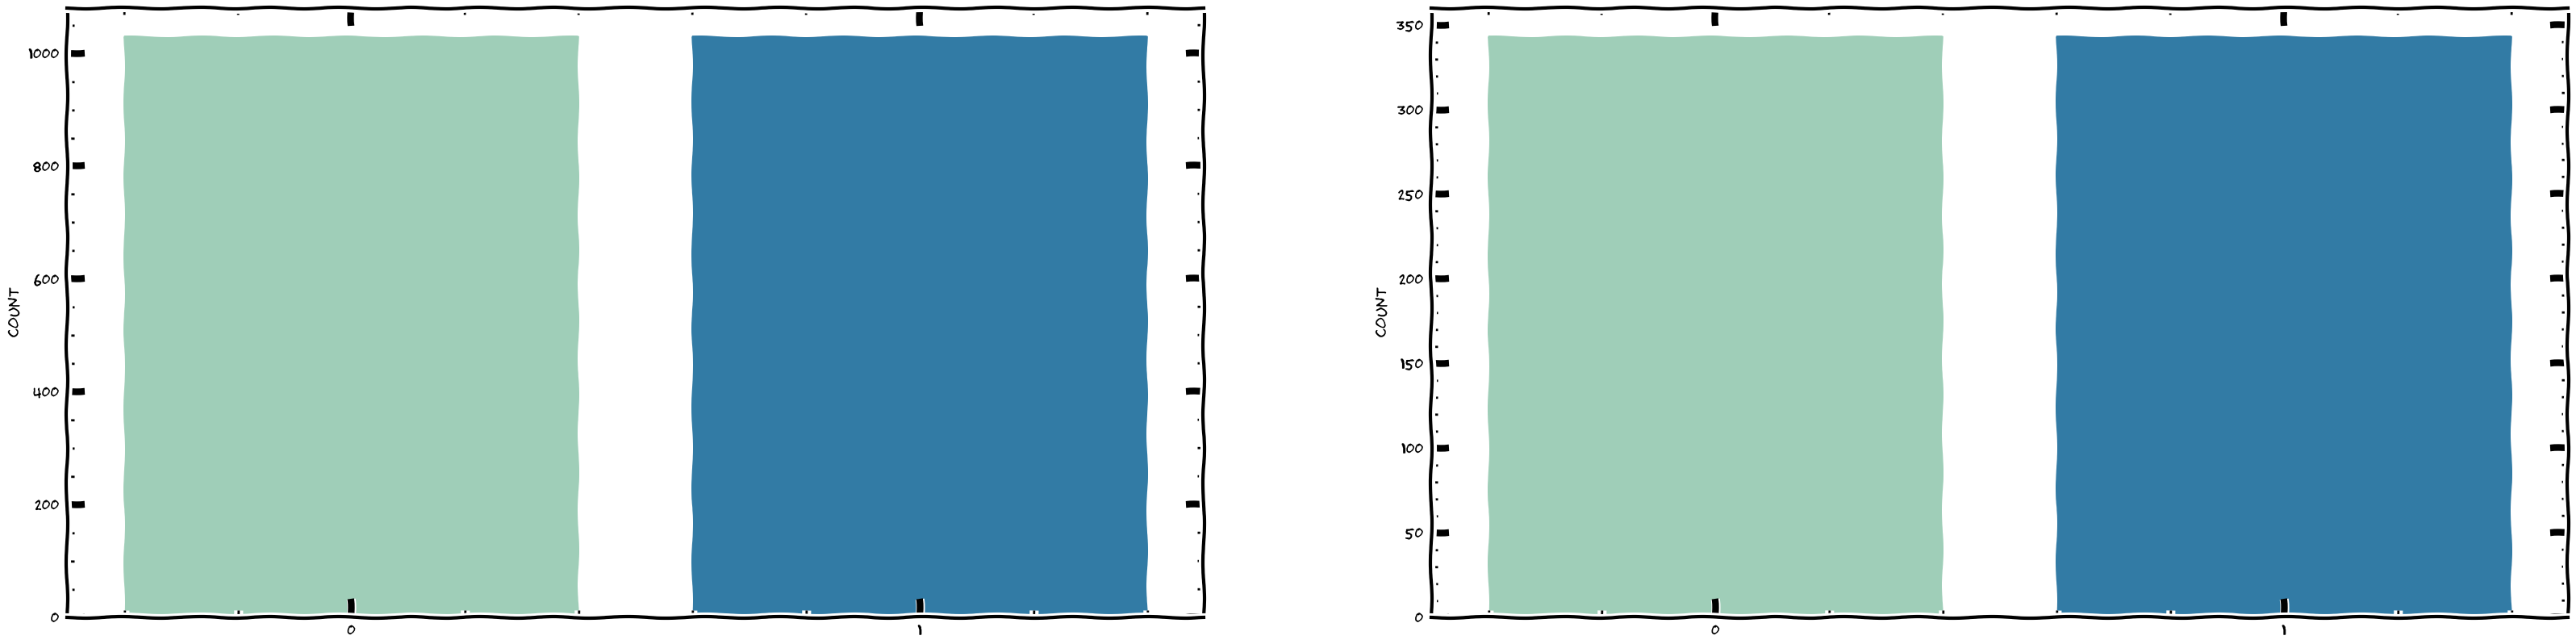

In [ ]:
with plt.xkcd():
  fig, ax = plt.subplots(1, 2, figsize=(20, 5))
  axes = ax.ravel()

  sns.countplot(x=y_train_res, ax=axes[0], palette="YlGnBu")
  sns.countplot(x=y_test_res, ax=axes[1], palette="YlGnBu")
  plt.show()

#```RandomForestClassifier```

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#```Hyperparameter Tuning + Modelling```

In [ ]:
max_depth = [4, 5, 6, 7]
n_estimators = [100, 150, 200, 250]
# min_samples_split = [2, 4, 6, 8]
min_samples_leaf = [1, 3, 5, 7]

param_grid = {
    "max_depth": max_depth,
    # "n_estimators": n_estimators
    "min_samples_leaf": min_samples_leaf
}
# As the class is imbalanced, we are selecting "class_weight=balanced"
rf_clf = RandomForestClassifier(random_state=42)
# here refit=recall is selected, because we are interested in driver churn
grid_search = GridSearchCV(rf_clf, param_grid=param_grid, n_jobs=2, refit="recall")
grid_search.fit(X_train_res, y_train_res)
# print(f"Best Hyperparameters: max_depth -> {grid_search.best_params_['max_depth']}, n_estimatords -> {grid_search.best_params_['n_estimators']}, min_samples_leaf -> {grid_search.best_params_['min_samples_leaf']}")
# print(f"Best Hyperparameters: max_depth -> {grid_search.best_params_['max_depth']}, n_estimatords -> {grid_search.best_params_['n_estimators']}")
print(f"Best Hyperparameters: max_depth -> {grid_search.best_params_['max_depth']}, min_samples_leaf -> {grid_search.best_params_['min_samples_leaf']}")

Best Hyperparameters: max_depth -> 7, min_samples_leaf -> 1


In [ ]:
# rf_clf = RandomForestClassifier(class_weight="balanced", max_depth=grid_search.best_params_['max_depth'],
#                                 n_estimators=grid_search.best_params_['n_estimators'],
#                                 min_samples_leaf=grid_search.best_params_['min_samples_leaf'])
rf_clf = RandomForestClassifier(min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                max_depth=grid_search.best_params_['max_depth'])

rf_clf.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=7)

#<font color="red" face="georgia">Observations</font>

After hyperparameter tuning of the RandomForestClassifier, max_depth = 7 and min_samples_leaf = 1 are found to be optimal.

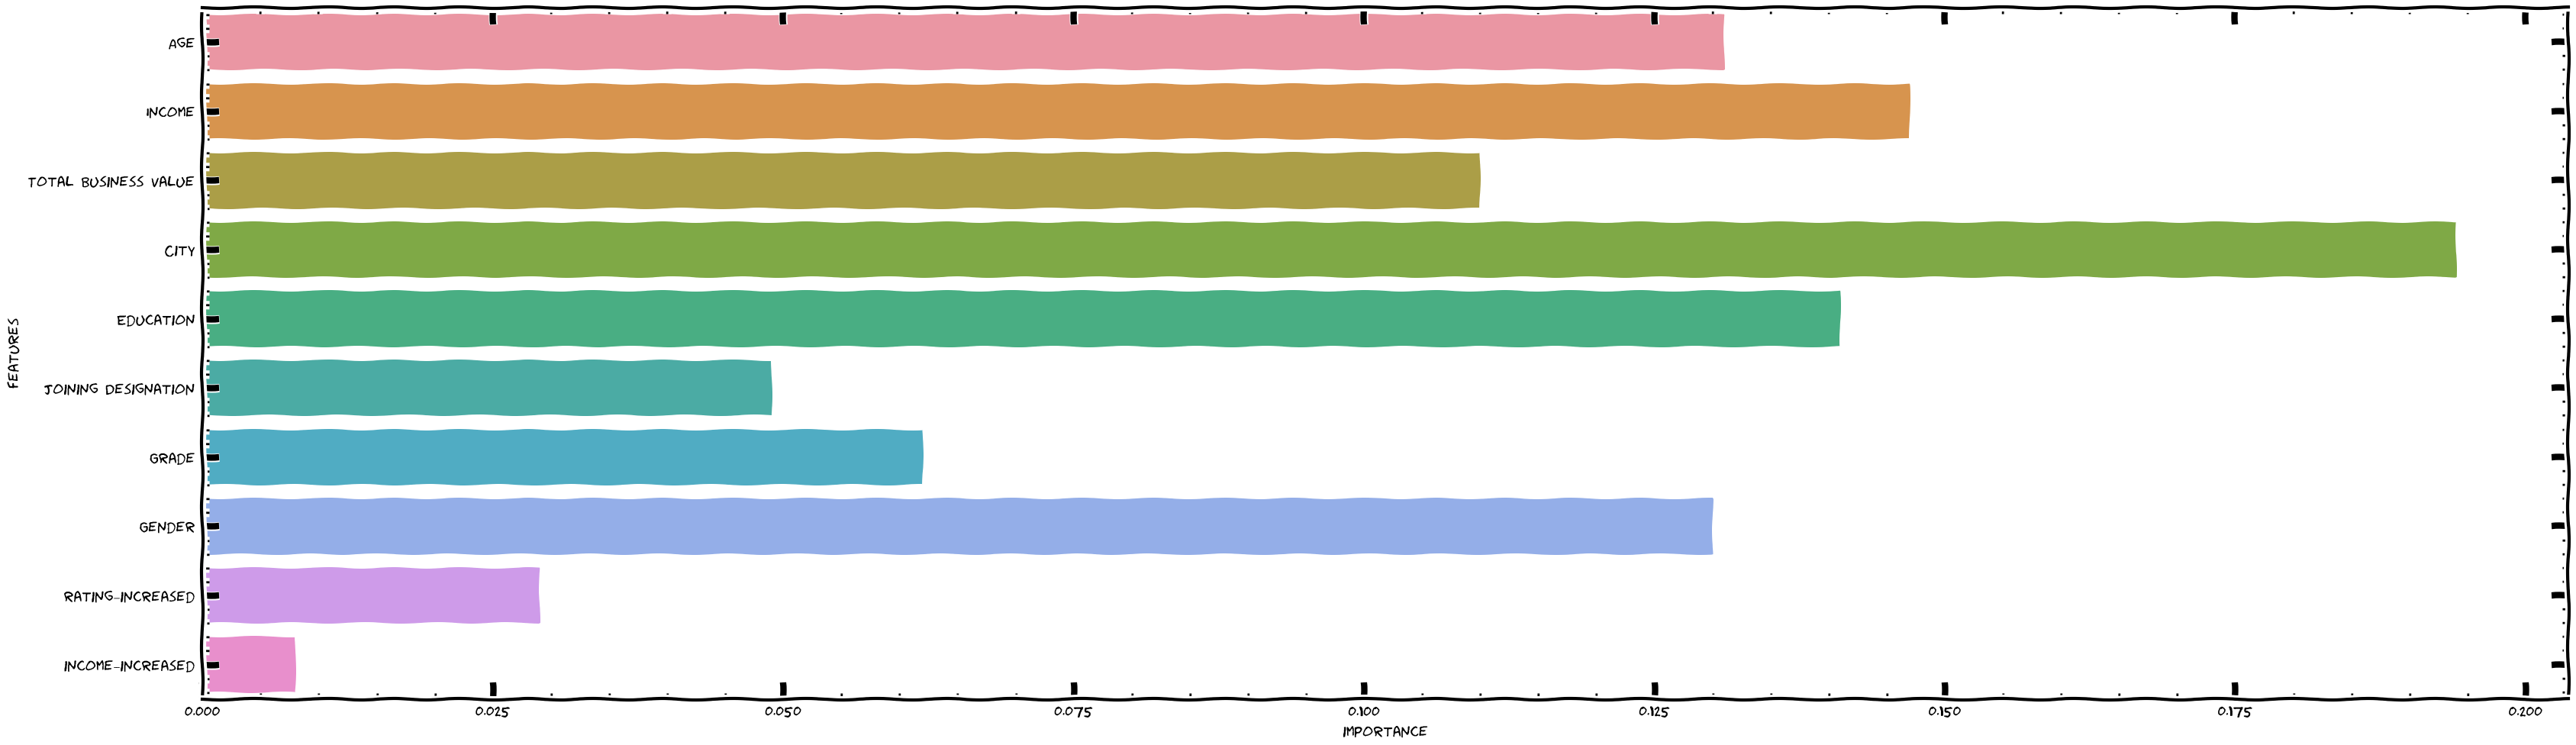

In [ ]:
feature_importance = pd.DataFrame(data={
    "features": rf_clf.feature_names_in_,
    "importance": np.round(rf_clf.feature_importances_, 3)
})
with plt.xkcd():
  plt.figure(figsize=(20, 6))
  sns.barplot(data=feature_importance, y="features", x="importance")
  plt.show()

#<font color="red" face="georgia">Feature Importance (Model Based)</font>

It is found that ```city, income, age, education, and gender``` are important factors in determining a driver's churn.

In [ ]:
!pip3 install shap

In [ ]:
import shap
shap.initjs()

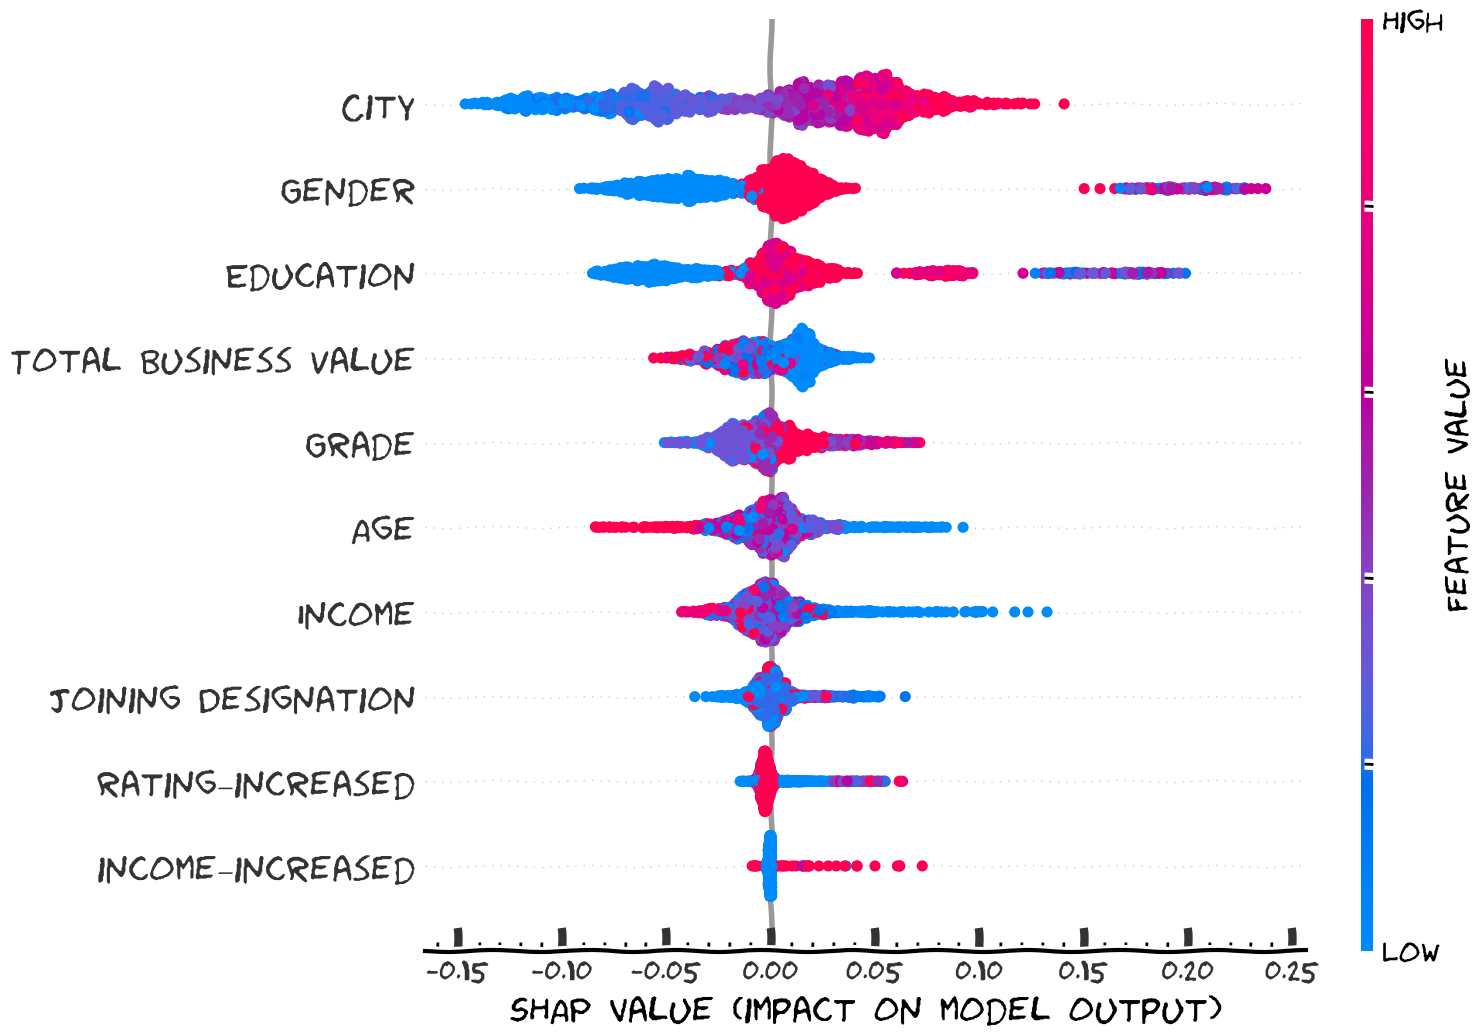

In [ ]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(rf_clf)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_train_res)

# Make plot. Index of [1] is explained in text below.
with plt.xkcd():
  plt.figure(figsize=(10, 1))
  shap.summary_plot(shap_values[1], X_train_res)
  plt.show()

#<font color="red" face="georgia">Feature Importance (SHAP)</font>

It is found that ```city, gender, education, total business value, and grade``` are important factors in determining a driver's churn.

##```Partial Dependence Plot```

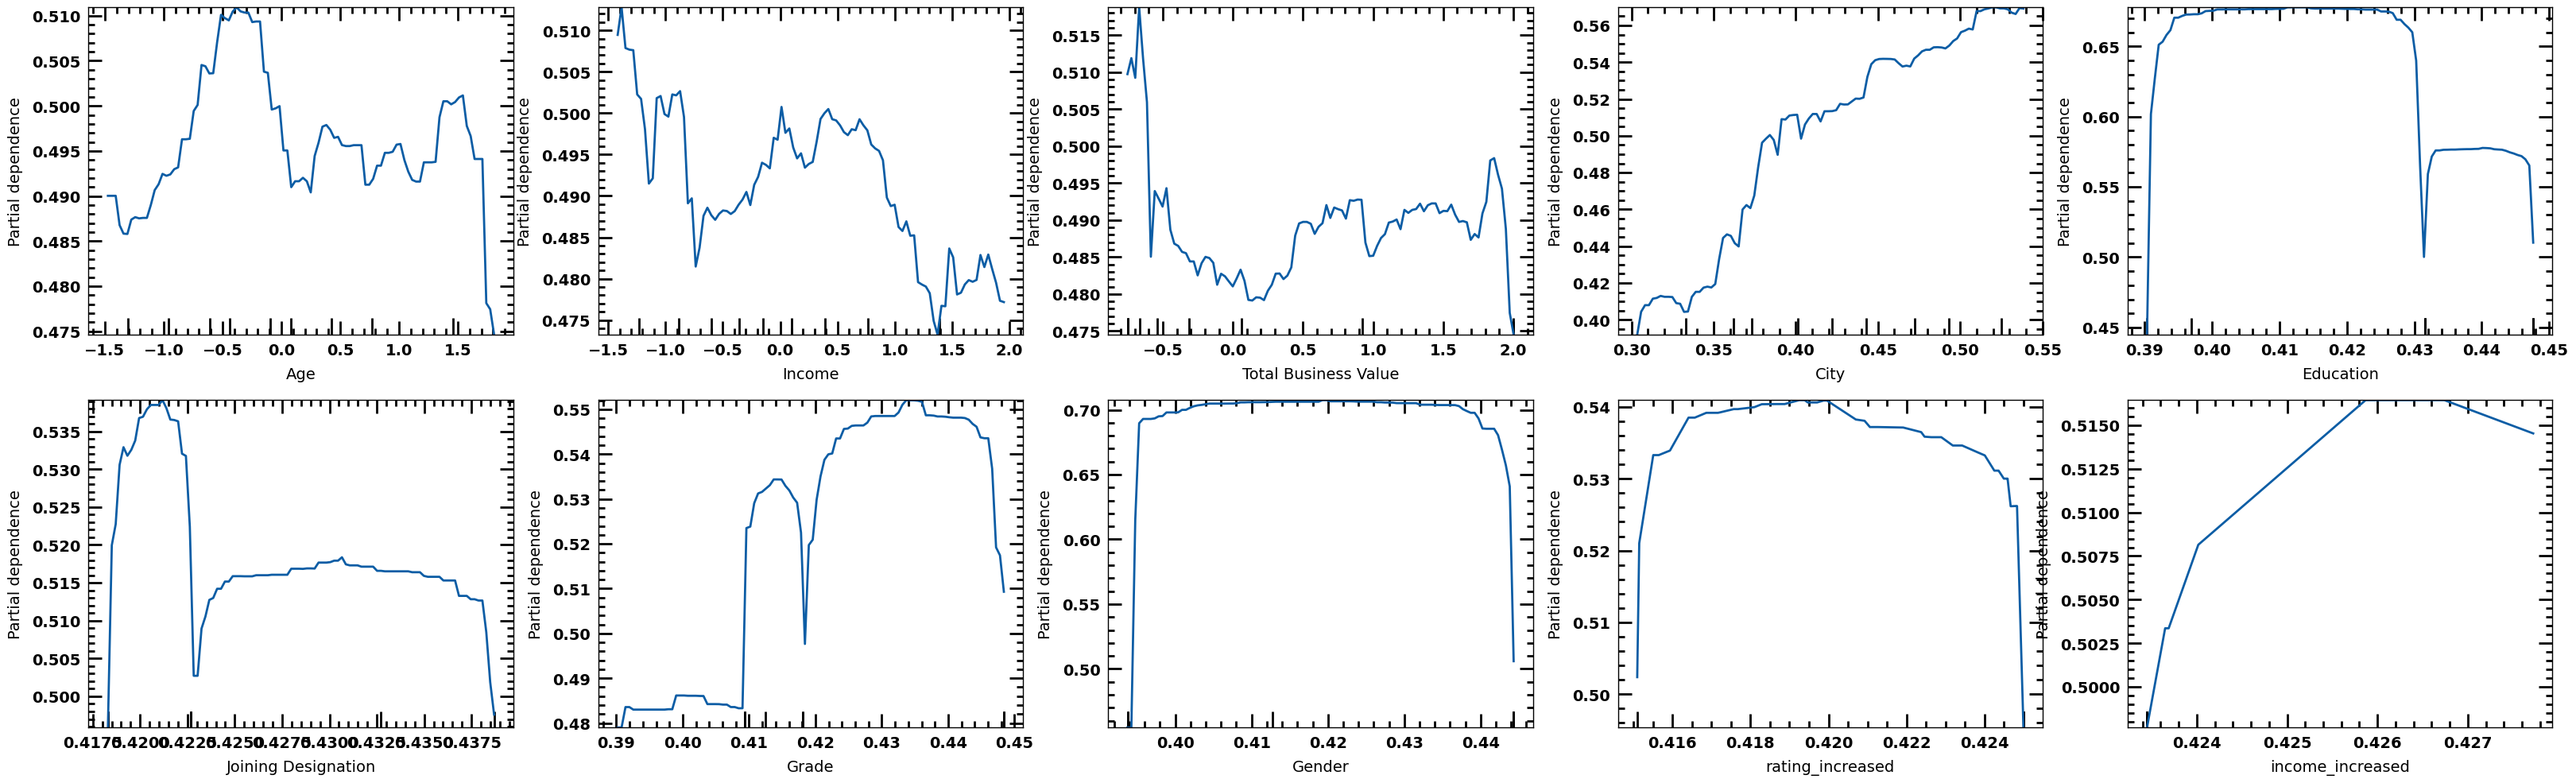

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
fig, ax = plt.subplots(2, 5, figsize=(20, 6))
axes = ax.ravel()
for index, column in enumerate(list(X_train_res.columns)):
  PartialDependenceDisplay.from_estimator(rf_clf, X_train_res, [index], ax=axes[index])

In [ ]:
!pip3 install yellowbrick

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc, classification_report
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


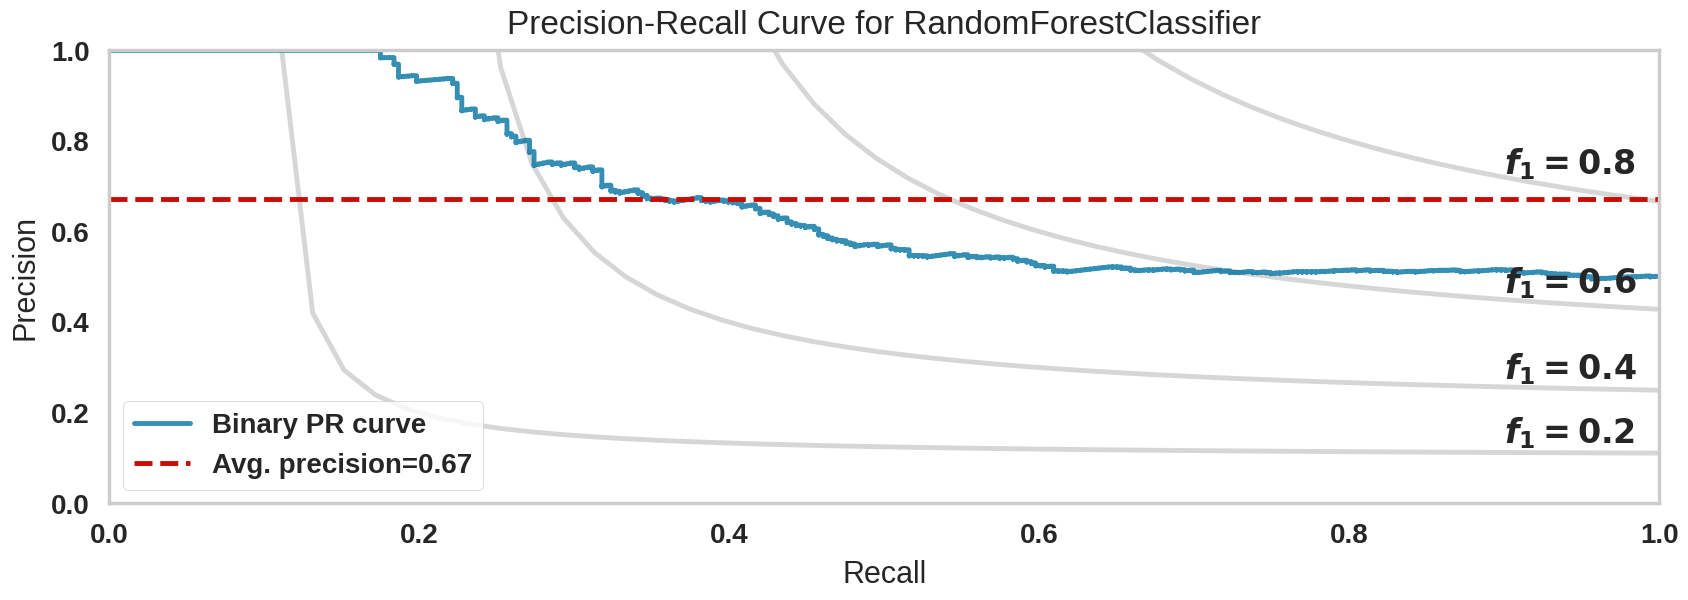

In [ ]:
# rf_clf = RandomForestClassifier(class_weight="balanced", max_depth=grid_search.best_params_['max_depth'],
#                                 n_estimators=grid_search.best_params_['n_estimators'],
#                                 min_samples_leaf=grid_search.best_params_['min_samples_leaf'])

# rf_clf.fit(X_train_preprocessed, y_train)
plt.figure(figsize=(10, 3))
viz = PrecisionRecallCurve(rf_clf, per_class=True, iso_f1_curves=True)
viz.fit(X_train_res, y_train_res)
viz.score(X_test_res, y_test_res)
viz.show()
plt.show()

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


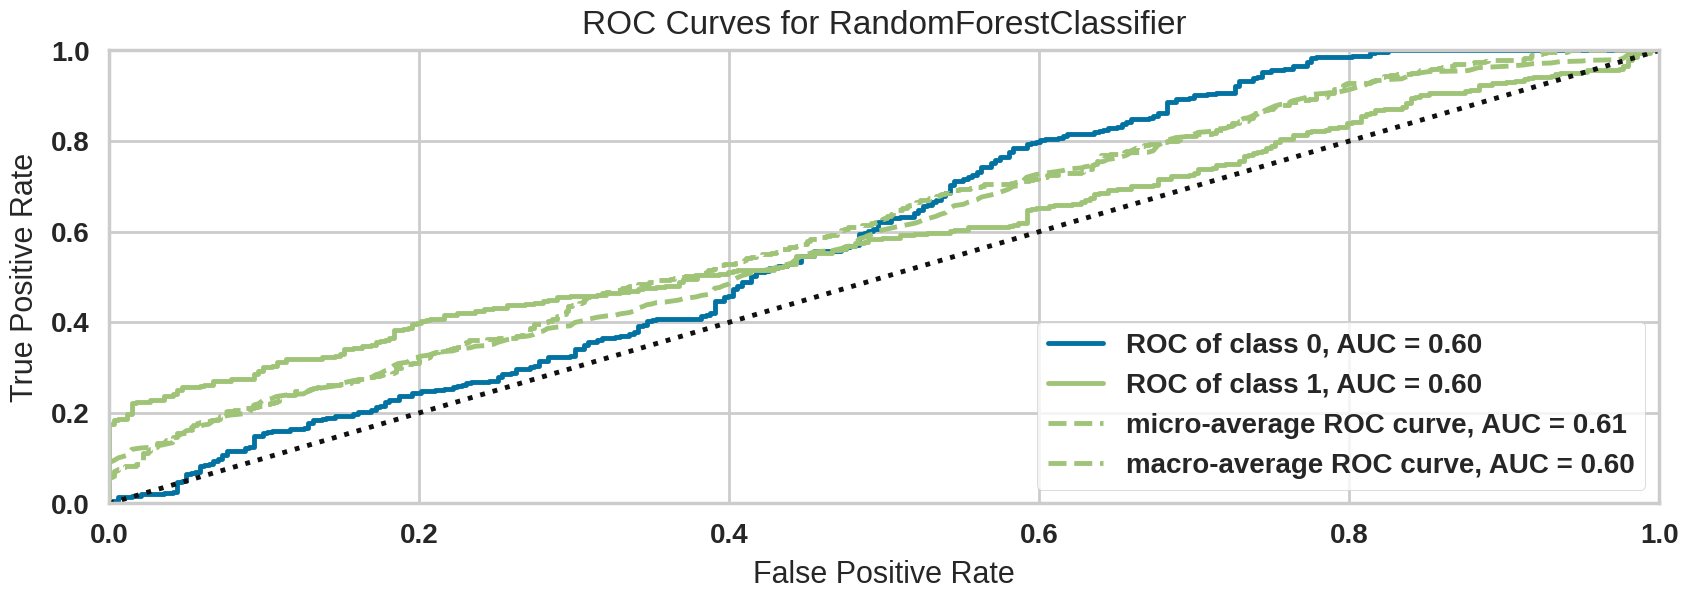

In [ ]:
plt.figure(figsize=(10, 3))
# model = LogisticRegression(max_iter=500)
visualizer = ROCAUC(rf_clf, classes=list(np.unique(y_train)), per_class=True, iso_f1_curves=True)

visualizer.fit(X_train_res, y_train_res)        # Fit the training data to the visualizer
visualizer.score(X_test_res, y_test_res)        # Evaluate the model on the test data
visualizer.show()
plt.show()

In [ ]:
# # TEST SET - 
# plt.figure(figsize=(10, 3))
# visualizer = ClassificationReport(rf_clf, classes=list(np.unique(y_train)), support=True)

# visualizer.fit(X_train_res, y_train_res)        # Fit the visualizer and the model
# visualizer.score(X_test_res, y_test_res)        # Evaluate the model on the test data
# visualizer.show()
# plt.show()

from sklearn.metrics import classification_report

print(classification_report(y_test_res, rf_clf.predict(X_test_res)))

              precision    recall  f1-score   support

           0       0.55      0.65      0.60       343
           1       0.58      0.48      0.52       343

    accuracy                           0.56       686
   macro avg       0.56      0.56      0.56       686
weighted avg       0.56      0.56      0.56       686



In [ ]:
from yellowbrick.classifier import ConfusionMatrix

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


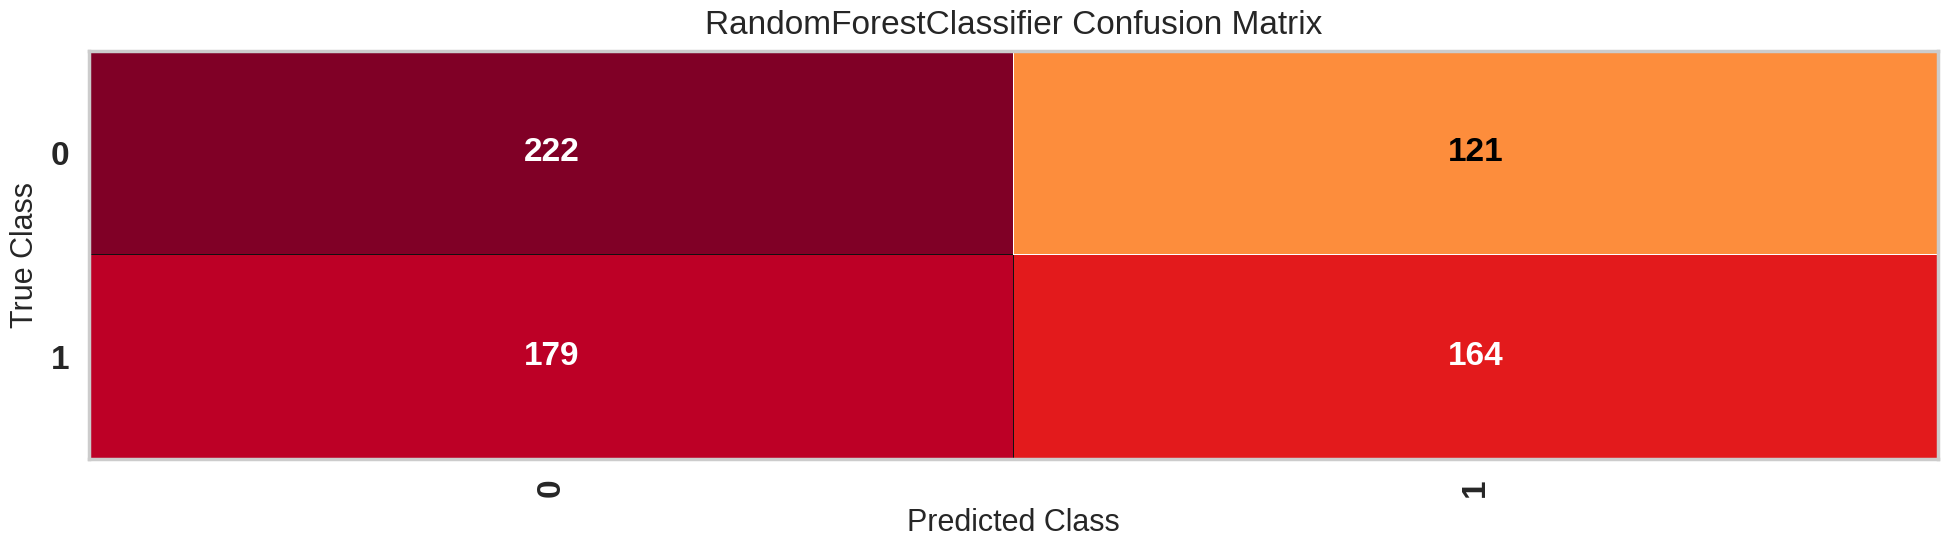

In [ ]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(rf_clf, classes=np.unique(y_train_res))

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train_res, y_train_res)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
plt.figure(figsize=(10, 3))
cm.score(X_test_res, y_test_res)
cm.show()
plt.show()

##<font color="red" face="georgia">Observations</font>

1. ROC AUC: We are getting an AUC value of 0.60, which is above 0.5, indicating that the model is performing better than the random classifier.
2. Precision-Recall Curve: From the graph, we can see that at precision close to 1, recall is 0.18. We get maximum recall when precision is at 0.5.
3. Classification Report: We can see that the recall of drivers churned is only 0.51, while the F1 score is 0.55. The accuracy of the random forest classifier is 0.57.
4. Confusion Matrix: True Positive is 176, and True Negative is 218.

#```XGBoostClassifier```

In [ ]:
from xgboost import XGBClassifier

#```Hyperparameter Tuning + Modelling```

In [ ]:
max_depth = [4, 5, 6, 7]
n_estimators = [100, 150, 200, 250]
# eta = [0.3, 0.4, 0.5, 0.6]
colsample_bytree = [0.6, 0.5, 0.7]
# min_samples_split = [2, 4, 6, 8]
# min_samples_leaf = [1, 3, 5, 7]

param_grid = {
    "max_depth": max_depth,
    "colsample_bytree": colsample_bytree
    # "eta": eta
    # "n_estimators": n_estimators
    # "min_samples_leaf": min_samples_leaf
}
# As the class is imbalanced, we are selecting "class_weight=balanced"
xgb_clf = XGBClassifier(random_state=42)
# here refit=recall is selected, because we are interested in driver churn
grid_search = GridSearchCV(xgb_clf, param_grid=param_grid, n_jobs=2, refit="recall")
grid_search.fit(X_train_res, y_train_res)

GridSearchCV(estimator=XGBClassifier(random_state=42), n_jobs=2,
             param_grid={'colsample_bytree': [0.6, 0.5, 0.7],
                         'max_depth': [4, 5, 6, 7]},
             refit='recall')

In [ ]:
xgb_clf = XGBClassifier(max_depth=grid_search.best_params_['max_depth'], colsample_bytree=grid_search.best_params_['colsample_bytree'])
xgb_clf.fit(X_train_res, y_train_res)

XGBClassifier(colsample_bytree=0.7, max_depth=5)

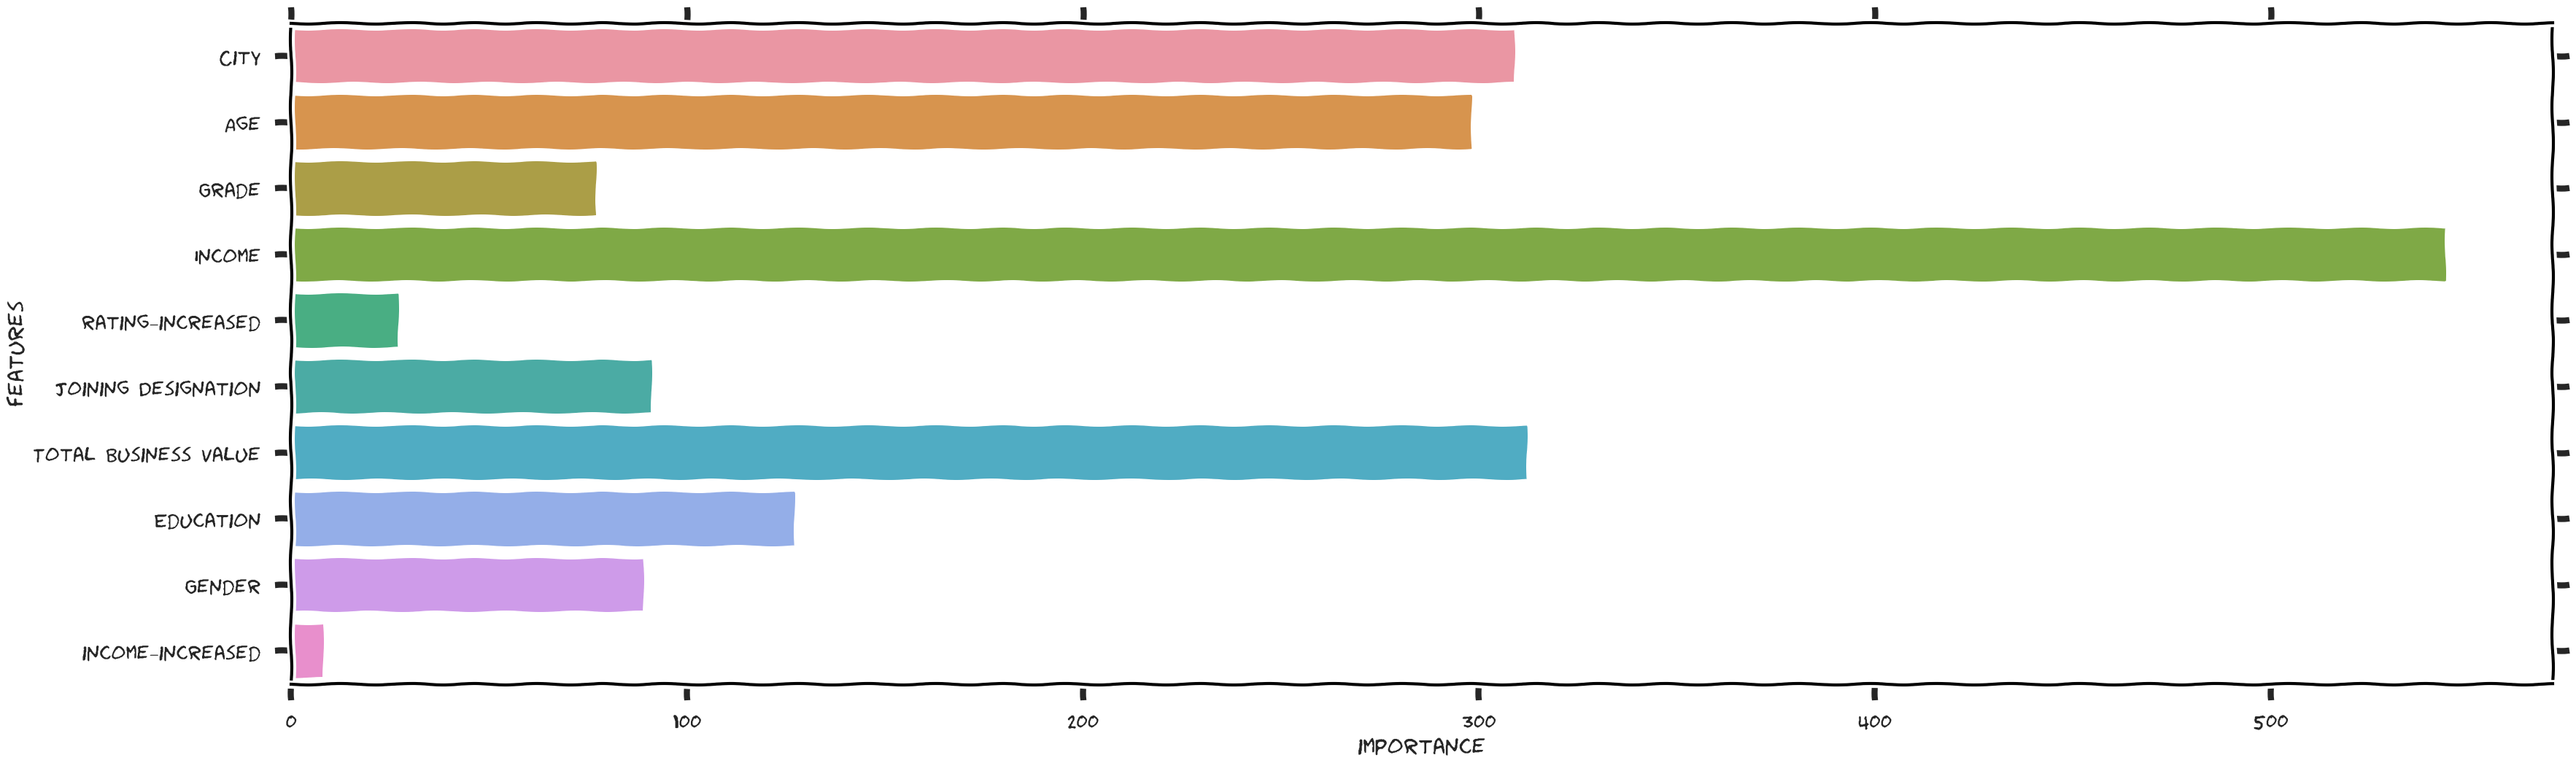

In [ ]:
importance = np.array(list(xgb_clf.get_booster().get_score().values()))
features = np.array(xgb_clf.get_booster().get_score().keys())

feature_importance = pd.DataFrame(data={
    "features": features,
    "importance": importance.round(3)
})
with plt.xkcd():
  plt.figure(figsize=(20, 6))
  sns.barplot(data=feature_importance, y="features", x="importance")
  plt.show()


#<font color="red" face="georgia">Feature Importance (Model Based)</font>

It is found that ```income, total business value, city, and age``` are important factors in determining a driver's churn.

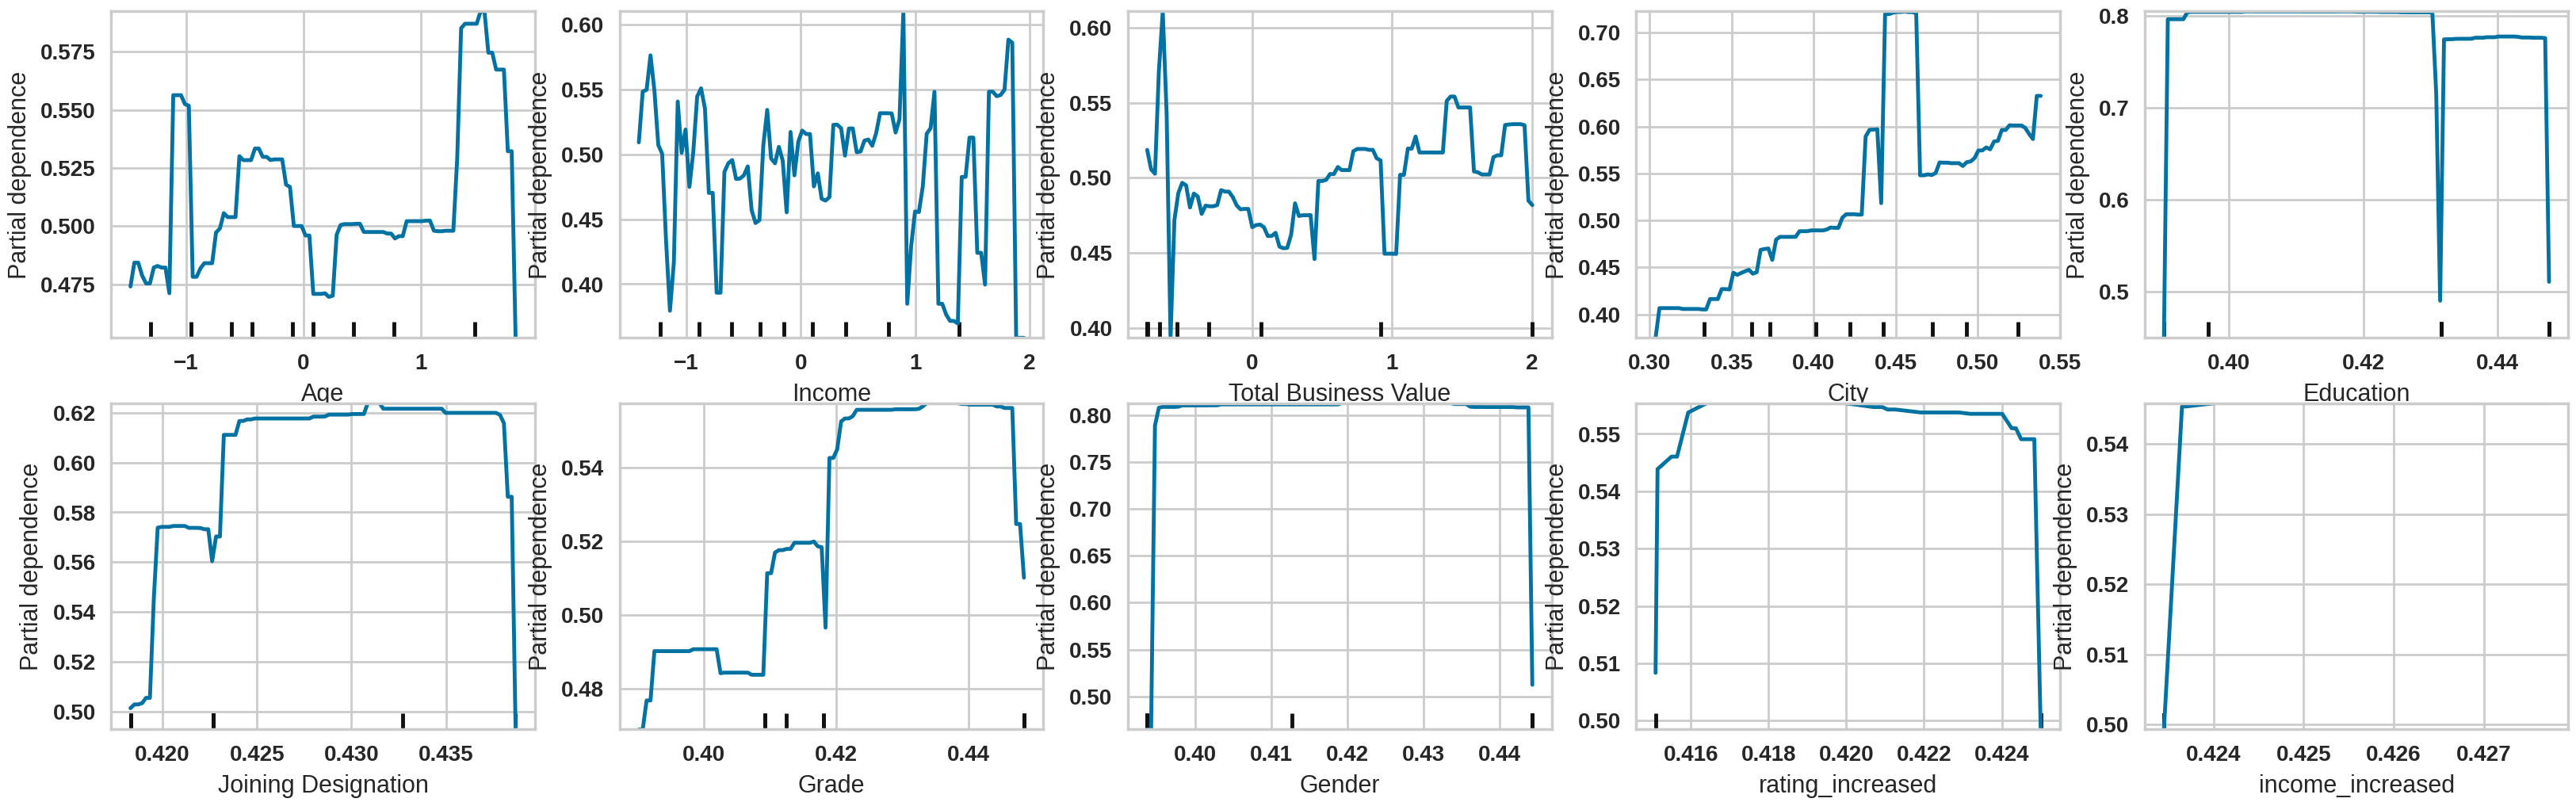

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
fig, ax = plt.subplots(2, 5, figsize=(20, 6))
axes = ax.ravel()
for index, column in enumerate(list(X_train_res.columns)):
  PartialDependenceDisplay.from_estimator(xgb_clf, X_train_res, [index], ax=axes[index])

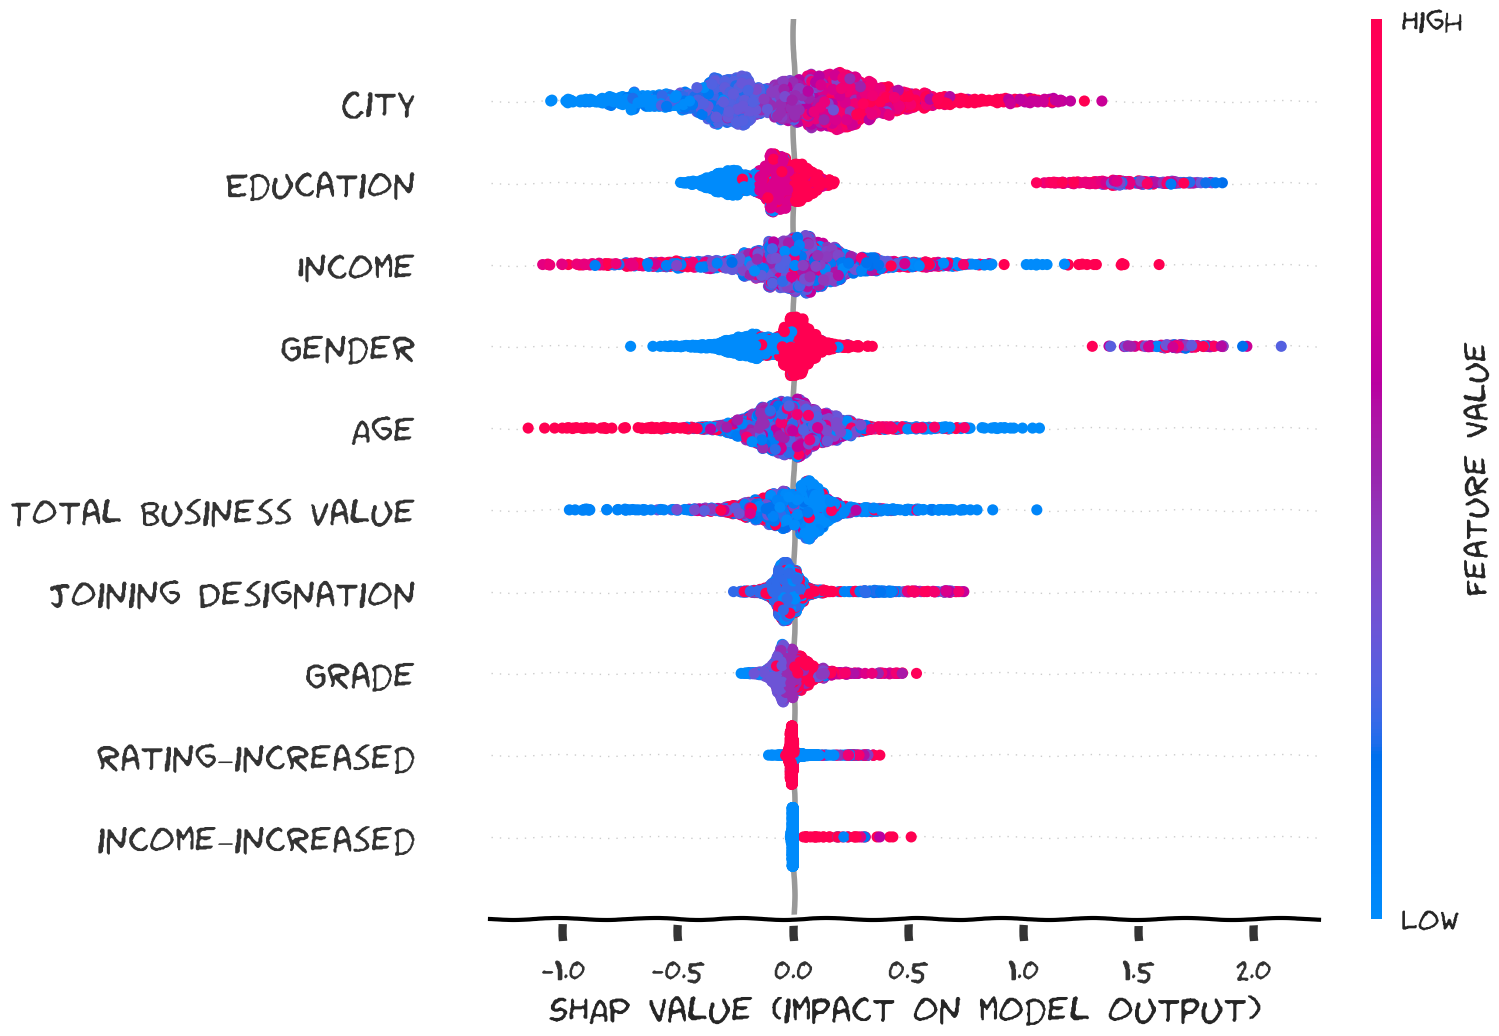

In [ ]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(xgb_clf)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_train_res)

# Make plot. Index of [1] is explained in text below.
with plt.xkcd():
  plt.figure(figsize=(15, 3))
  shap.summary_plot(shap_values, X_train_res)
  plt.show()

#<font color="red" face="georgia">Feature Importance (SHAP)</font>

It is found that ```city, education, income, gender, and age``` are important factors in determining a driver's churn.

micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging


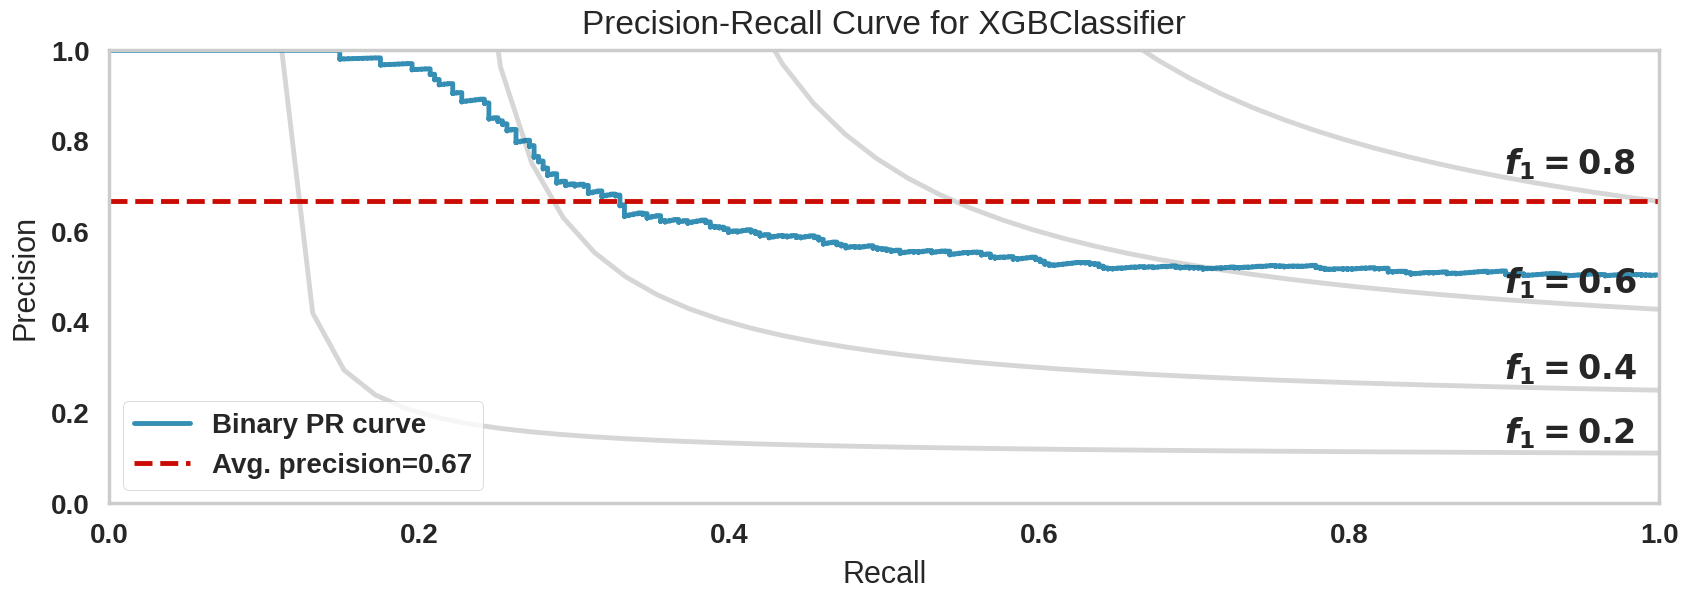

In [ ]:
plt.figure(figsize=(10, 3))
viz = PrecisionRecallCurve(xgb_clf, per_class=True, iso_f1_curves=True)
viz.fit(X_train_res, y_train_res)
viz.score(X_test_res, y_test_res)
viz.show()
plt.show()

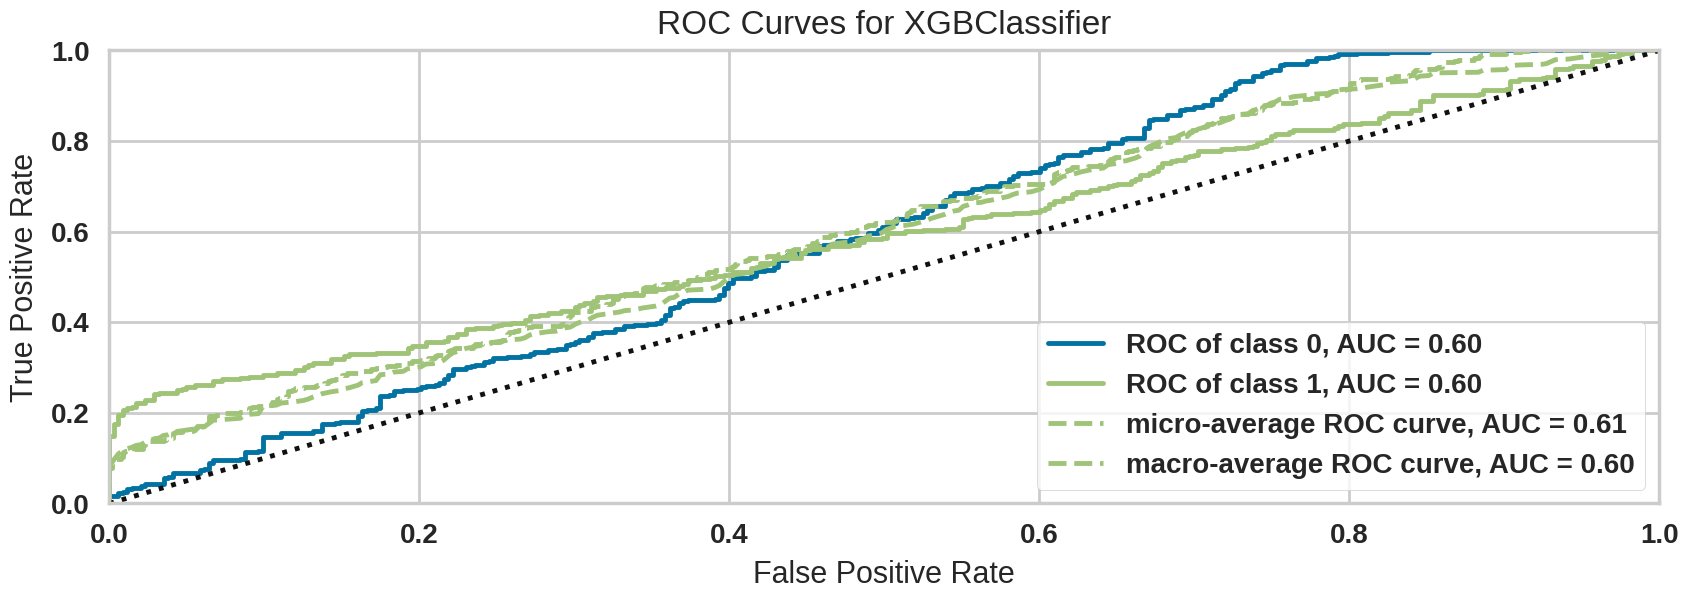

In [ ]:
plt.figure(figsize=(10, 3))
# model = LogisticRegression(max_iter=500)
visualizer = ROCAUC(xgb_clf, classes=list(np.unique(y_train)), per_class=True)

visualizer.fit(X_train_res, y_train_res)        # Fit the training data to the visualizer
visualizer.score(X_test_res, y_test_res)        # Evaluate the model on the test data
visualizer.show()
plt.show()

In [ ]:
# TEST SET - 
# plt.figure(figsize=(10, 3))
# visualizer = ClassificationReport(xgb_clf, classes=list(np.unique(y_train)), support=True)

# visualizer.fit(X_train_res, y_train_res)        # Fit the visualizer and the model
# visualizer.score(X_test_res, y_test_res)        # Evaluate the model on the test data
# visualizer.show()
# plt.show()

print(classification_report(y_test_res, xgb_clf.predict(X_test_res)))

              precision    recall  f1-score   support

           0       0.55      0.65      0.60       343
           1       0.57      0.47      0.52       343

    accuracy                           0.56       686
   macro avg       0.56      0.56      0.56       686
weighted avg       0.56      0.56      0.56       686



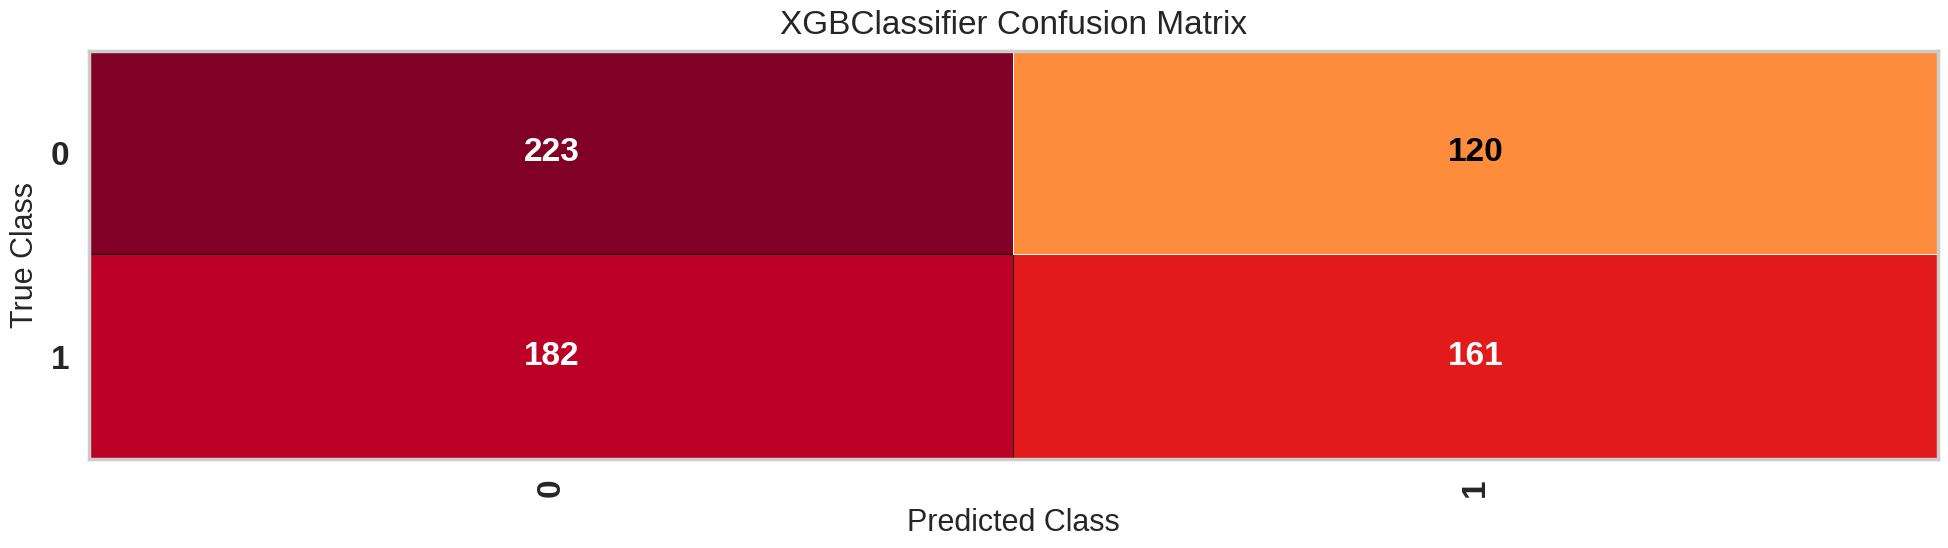

In [ ]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(xgb_clf, classes=np.unique(y_train_res))

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train_res, y_train_res)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
plt.figure(figsize=(10, 3))
cm.score(X_test_res, y_test_res)
cm.show()
plt.show()

#<font color="red" face="georgia">Observations</font>

1. ROC AUC: We are getting an AUC value of 0.59, which is above 0.5, indicating that the model is performing slightly better than the random classifier.
2. Precision-Recall Curve: From the graph, we can see that at precision close to 1, recall is 0.18. We get maximum recall when precision is at 0.5.
3. Classification Report: We can see that the recall of drivers churned is only 0.47, while the F1 score is 0.52. The accuracy of the XGBoost classifier is 0.56.
4. Confusion Matrix: True Positive is 153, and True Negative is 227.

#```ADABoost```

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#```Hyperparameter Tuning + Modelling```

In [ ]:
learning_rate = [1, 1.5, 2, 2.5]
param_grid = {
    "learning_rate": learning_rate,
    # "eta": eta
    # "n_estimators": n_estimators
    # "min_samples_leaf": min_samples_leaf
}
# As the class is imbalanced, we are selecting "class_weight=balanced"
ada_clf = AdaBoostClassifier()
# here refit=recall is selected, because we are interested in driver churn
grid_search = GridSearchCV(ada_clf, param_grid=param_grid, n_jobs=2, refit="recall")
grid_search.fit(X_train_res, y_train_res)

GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=2,
             param_grid={'learning_rate': [1, 1.5, 2, 2.5]}, refit='recall')

In [ ]:
ada_clf = AdaBoostClassifier(learning_rate=grid_search.best_params_['learning_rate'])
ada_clf.fit(X_train_res, y_train_res)

AdaBoostClassifier(learning_rate=1.5)

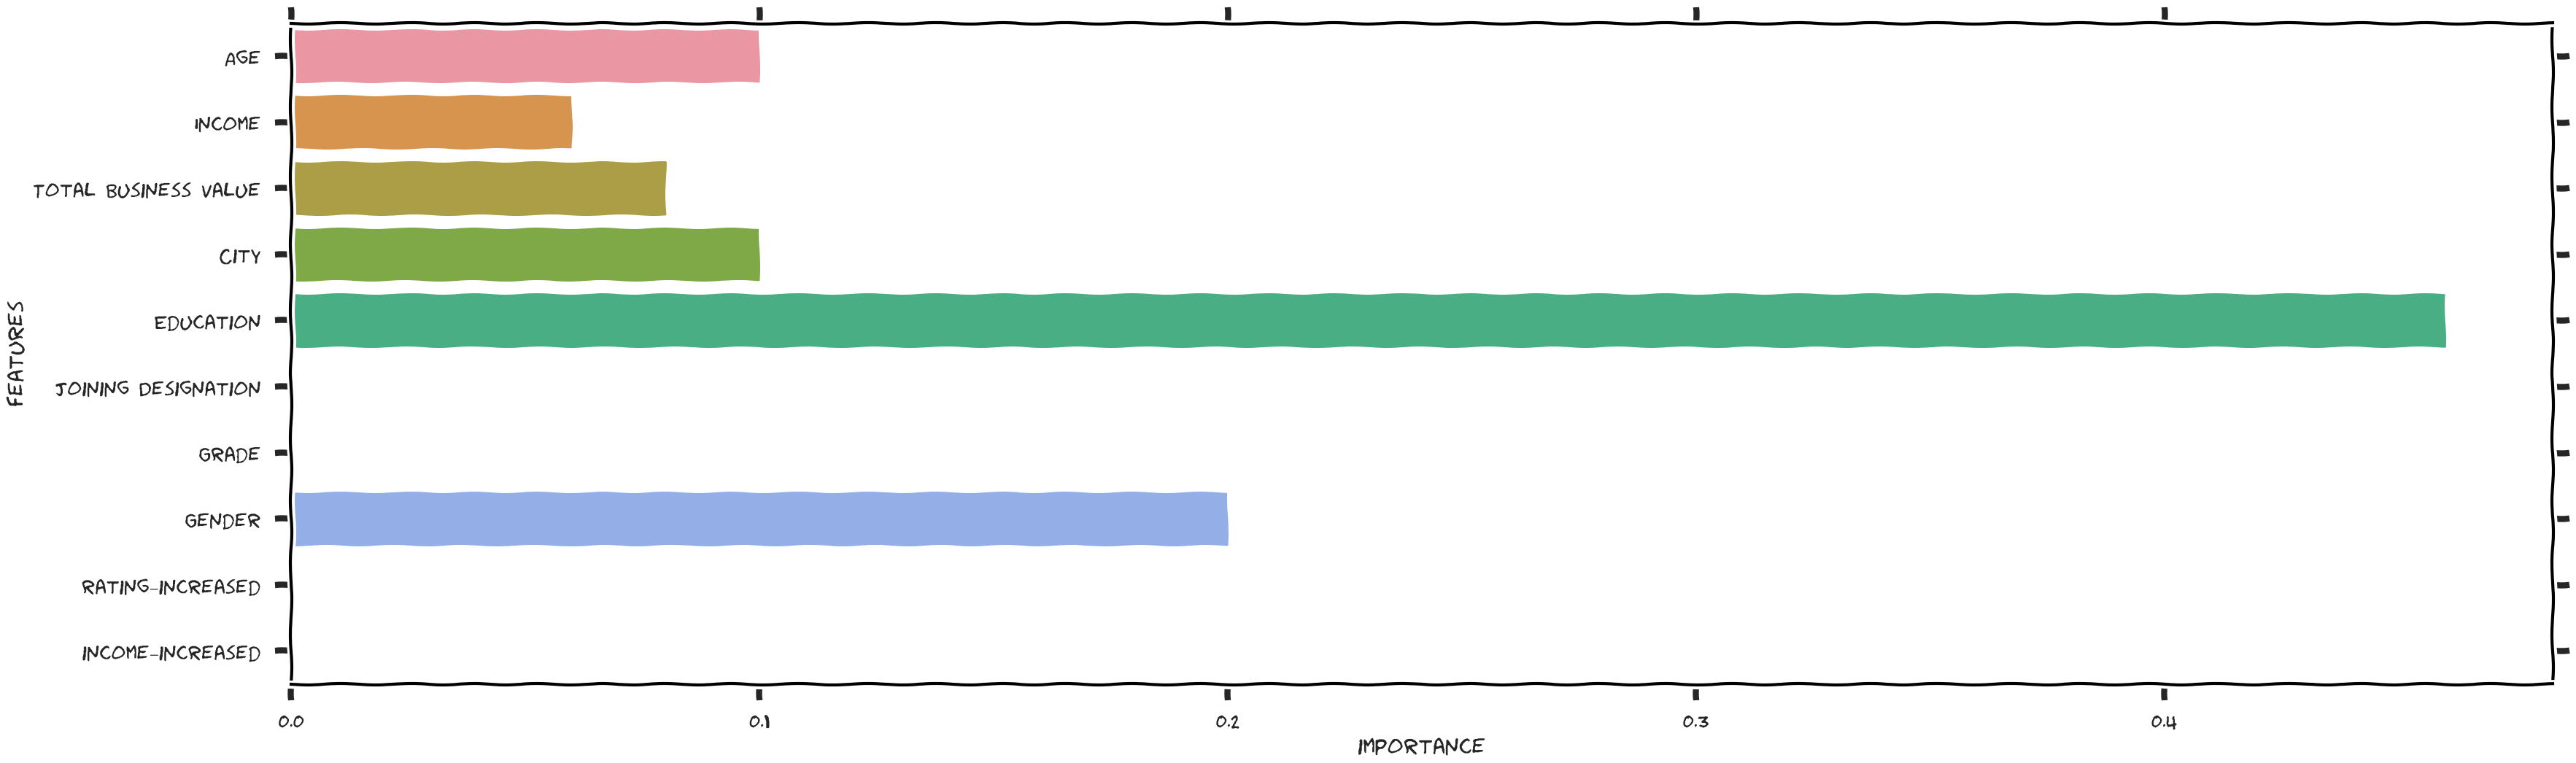

In [ ]:
feature_importance = pd.DataFrame(data={
    "features": ada_clf.feature_names_in_,
    "importance": np.round(ada_clf.feature_importances_, 3)
})
with plt.xkcd():
  plt.figure(figsize=(20, 6))
  sns.barplot(data=feature_importance, y="features", x="importance")
  plt.show()

#<font color="red" face="georgia">Feature Importance (Model Based)</font>

It is found that from AdaBoost ```Education, gender, city, age, and total business value``` are important factors in determining a driver's churn.

P.S: Shap does not support AdaBoostClassifier

Attempting to set identical bottom == top == 0.5007676251494909 results in singular transformations; automatically expanding.
Attempting to set identical bottom == top == 0.5008439651617743 results in singular transformations; automatically expanding.
Attempting to set identical bottom == top == 0.5008439651617743 results in singular transformations; automatically expanding.
Attempting to set identical bottom == top == 0.5008439651617743 results in singular transformations; automatically expanding.
Attempting to set identical bottom == top == 0.5008439651617743 results in singular transformations; automatically expanding.


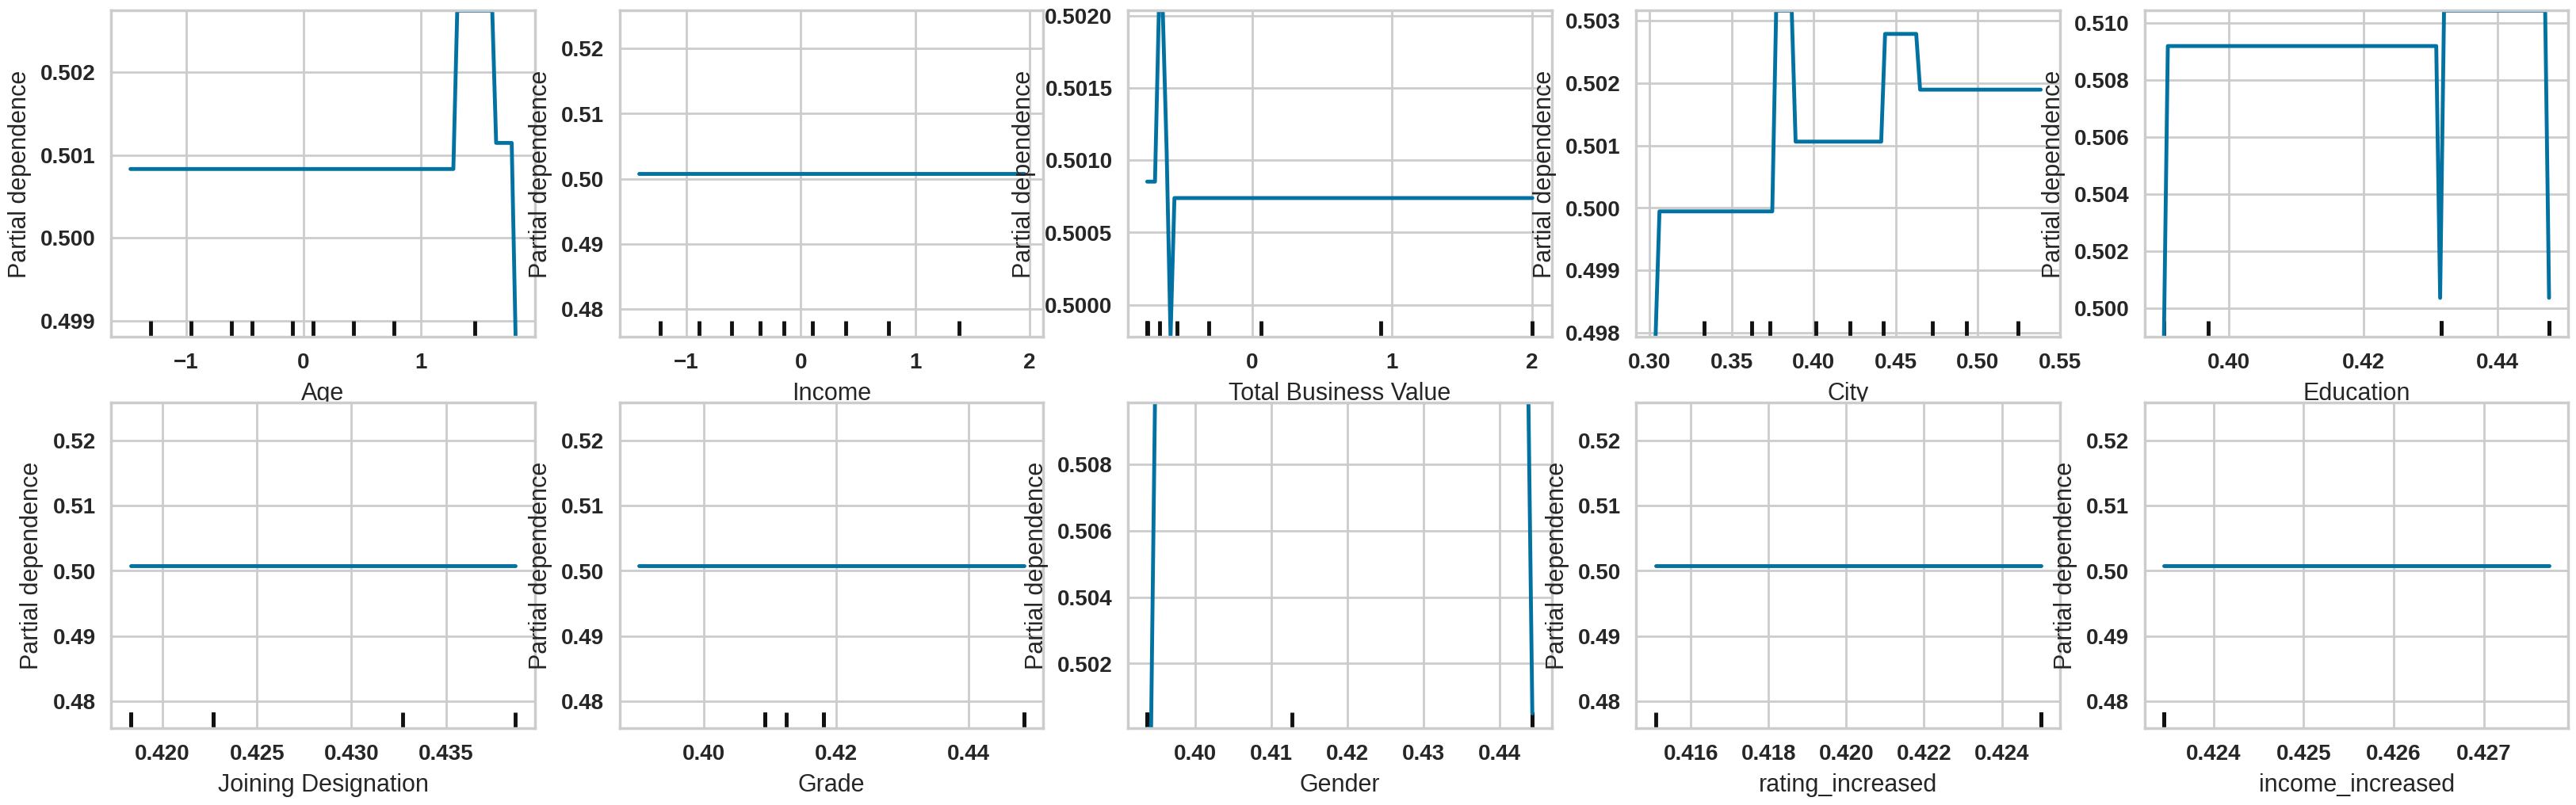

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
fig, ax = plt.subplots(2, 5, figsize=(20, 6))
axes = ax.ravel()
for index, column in enumerate(list(X_train_res.columns)):
  PartialDependenceDisplay.from_estimator(ada_clf, X_train_res, [index], ax=axes[index])

micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
X does not have valid feature names, but AdaBoostClassifier was fitted with feature names


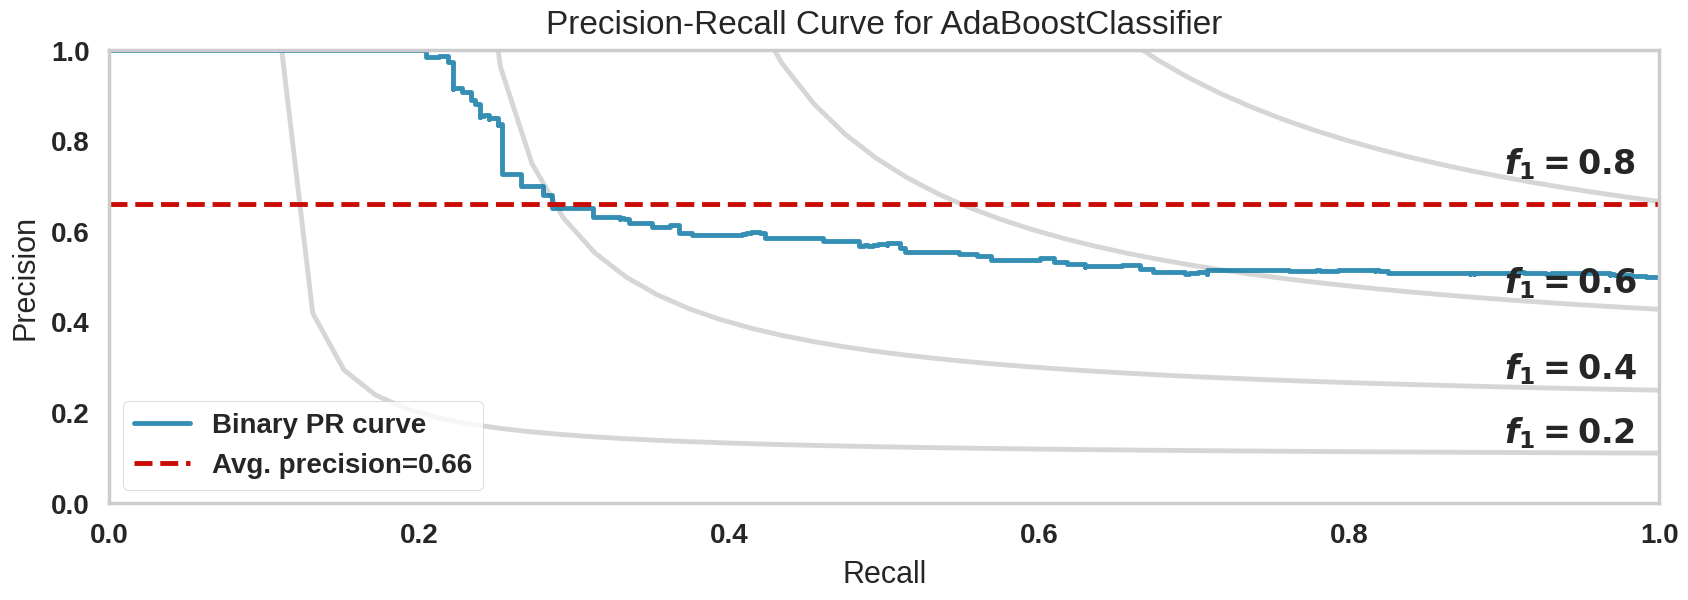

In [ ]:
plt.figure(figsize=(10, 3))
viz = PrecisionRecallCurve(ada_clf, per_class=True, iso_f1_curves=True)
viz.fit(X_train_res, y_train_res)
viz.score(X_test_res, y_test_res)
viz.show()
plt.show()

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names


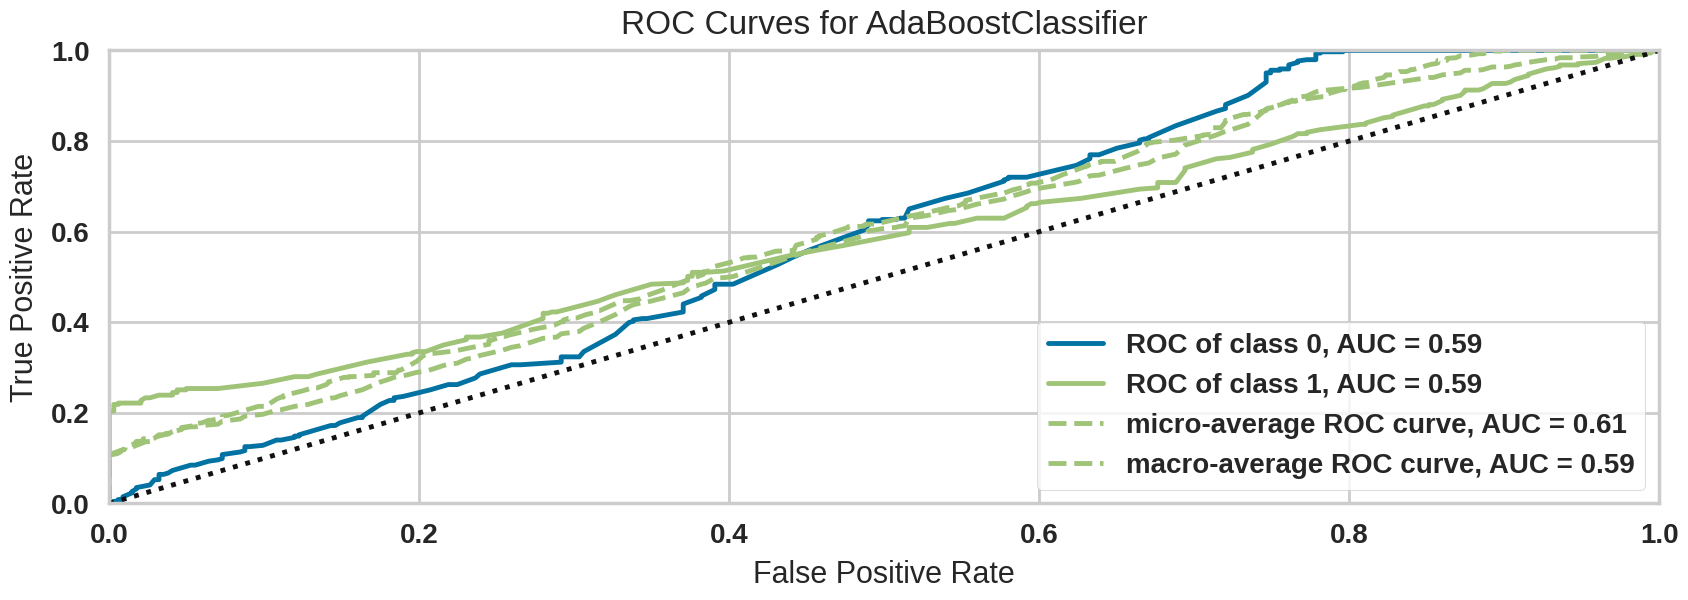

In [ ]:
plt.figure(figsize=(10, 3))
# model = LogisticRegression(max_iter=500)
visualizer = ROCAUC(ada_clf, classes=list(np.unique(y_train)), per_class=True)

visualizer.fit(X_train_res, y_train_res)        # Fit the training data to the visualizer
visualizer.score(X_test_res, y_test_res)        # Evaluate the model on the test data
visualizer.show()
plt.show()

In [ ]:
# TEST SET - 
# plt.figure(figsize=(10, 3))
# visualizer = ClassificationReport(ada_clf, classes=list(np.unique(y_train)), support=True)

# visualizer.fit(X_train_res, y_train_res)        # Fit the visualizer and the model
# visualizer.score(X_test_res, y_test_res)        # Evaluate the model on the test data
# visualizer.show()
# plt.show()

print(classification_report(y_test_res, ada_clf.predict(X_test_res)))

              precision    recall  f1-score   support

           0       0.55      0.63      0.59       343
           1       0.57      0.49      0.52       343

    accuracy                           0.56       686
   macro avg       0.56      0.56      0.56       686
weighted avg       0.56      0.56      0.56       686



X does not have valid feature names, but AdaBoostClassifier was fitted with feature names


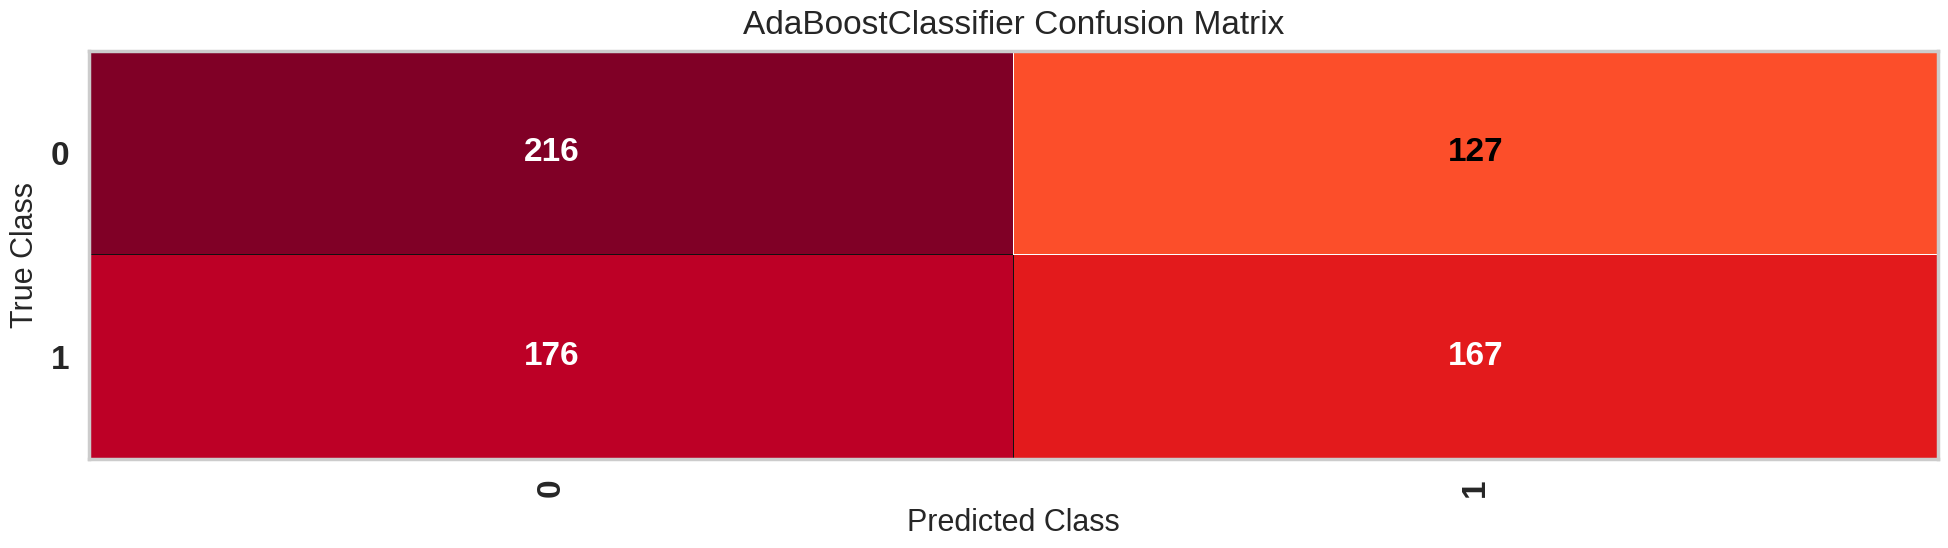

In [ ]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(ada_clf, classes=np.unique(y_train_res))

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train_res, y_train_res)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
plt.figure(figsize=(10, 3))
cm.score(X_test_res, y_test_res)
cm.show()
plt.show()

#<font color="red" face="georgia">Observations</font>

1. ROC AUC: We are getting an AUC value of 0.59, which is above 0.5, indicating that the model is performing slightly better than the random classifier.
2. Precision-Recall Curve: From the graph, we can see that at precision close to 1, recall is 0.21. When precision is set to 0.58, we get the best recall.
3. Classification Report: We can see that the recall of drivers churned is only 0.49, while the F1 score is 0.52. The accuracy of the AdaBoost classifier is 0.56.
4. Confusion Matrix: True Positive is 167, and True Negative is 216.

#<font color="red" face="georgia">Insights</font>

1. There has not been much difference in rating increases and income increases between churning and non-churning driver groups.

2. Strangely, the total business value is higher for the drivers who have churned.

3. The majority of the drivers who quit had only a 10+ level education.

4. Interestingly, female drivers have generated more business value compared to male drivers. Female drivers have a higher median total business than male drivers.

5. The majority of churned drivers had city code C15, followed by C20, while the non-churned drivers had city code C20, followed by C29.

6. Drivers with a grade of 2.0 have the highest attrition rate, followed by grade 1. Grade 5 has an equal number of attrition and retention rates.


7. The attrition rate among the drivers with 12+ and graduates is nearly equal. Drivers with 10+ education have the highest retention rate.

8. It has been seen that city, age, income, and total business value are the most important factors in deciding a driver's churn rate.

#<font color="red" face="georgia">Recommendations</font>

1. Taxi service should hire more female drivers. as they bring more business values. This can be done by running social media campaigns on Women's Day and Mother's Day.

2. Clearly, there's more of a problem in cities C15 and C20, as more drivers are churning. Taxi service needs to survey these cities further to determine the root cause.

3. Taxi service should increase the salary of their female drivers, as there is a huge disparity between the male and female drivers' salaries.